In [1]:
import numpy as np
import os
import pandas as pd

from bestiapop import bestiapop

## Storing climate data in a pandas dataframe

In this example we will download data to a pandas dataframe

### Define your climate extraction variables

We need to define the scope of what type of data and output we expect from BestiaPop.

In [ ]:
# Define variables to pass in to ClimateBeast
action='generate-climate-file'
data_source='silo'
year_range='2015-2016'
climate_variables=['radiation', 'max_temp', 'min_temp', 'daily_rain']
lat_range=[-41.15, -41.05]
lon_range=[145.5, 145.6]
output_type='dataframe' # <-- selecting pandas dataframe as output of our data processing
output_path=None # <-- no dir since we are not dumping data to a file

## Instantiate and run BestiaPop

In [ ]:
climate_data = bestiapop.CLIMATEBEAST(
    action=action,
    data_source=data_source,
    output_path=output_path,
    output_type=output_type,
    input_path=None,
    climate_variables=climate_variables,
    year_range=year_range,
    lat_range=lat_range,
    lon_range=lon_range,
    multiprocessing=None
    )

In [ ]:
data = climate_data.process_records(action)

In [ ]:
# let's show the dataframe
data

## Storing climate data in met files

In this example we will download data to met files

### Define your climate extraction variables

We need to define the scope of what type of data and output we expect from BestiaPop.

In [ ]:
# Define variables to pass in to ClimateBeast
action='generate-climate-file'
data_source='silo'
year_range='2015-2016'
climate_variables=['radiation', 'max_temp', 'min_temp', 'daily_rain']
lat_range=[-41.15, -41.05]
lon_range=[145.5, 145.6]
output_type='met'
output_path=os.getcwd() # current dir

## Instantiate and run BestiaPop

In [ ]:
climate_data = bestiapop.CLIMATEBEAST(
    action='generate-climate-file',
    data_source=data_source,
    output_path=output_path,
    output_type=output_type,
    input_path=None,
    climate_variables=climate_variables,
    year_range=year_range,
    lat_range=lat_range,
    lon_range=lon_range,
    multiprocessing=None
    )

In [ ]:
climate_data.process_records(action) # no need to store the results in a variable since they are dumped to disk

## Zip the generated MET files & Download them

Let's now grab all the MET files and compress them. We need to get rid of the ocasional minus sign at the beginning of some 
MET files (depending on your lat/lon range), because `tar` does not do well with such filenames. In any case, this code should work for you.

> NOTE: make sure to change the extension of the file, depending on which format you chose for the output.

In [ ]:
%%bash
for f in *.met; do
    mv -- "$f" "bpop.${f}"
done

tar chvfz bestiapop_files.tar.gz bpop*.met

Search for your file by clicking `file --> open` in the top left menu of this JupterNotebook. You can download the compressed file and unzip in your own machine (we recommend you use `7zip` if using a Windows machine).

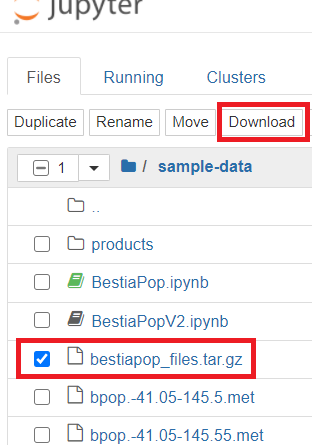

## Working with lists of lat/lon combinations

In this example we will download climate data based off a list of lat/lon datapoints

### Define your climate extraction variables

We need to define the scope of what type of data and output we expect from BestiaPop.

> **NOTE**: the `coordinate_list` variable contains lists of lat/lon pairs where the first value is `latitutde` and the second value is `longitude`

In [2]:
# Define variables to pass in to ClimateBeast

#Example of coordinates for the potato production areas of Tasmania, Australia
coordinate_list = [
[-39.6,144],
[-39.65,144],
[-39.65,144.05],
[-39.7,143.95],
[-39.7,144],
[-39.7,144.05],
[-39.7,144.1],
[-39.75,144],
[-39.75,144.05],
[-39.75,144.1],
[-39.75,147.9],
[-39.75,147.95],
[-39.8,143.95],
[-39.8,144],
[-39.8,144.05],
[-39.8,144.1],
[-39.8,148],
[-39.8,148.05],
[-39.85,143.9],
[-39.85,143.95],
[-39.85,144],
[-39.85,144.05],
[-39.85,144.1],
[-39.85,148],
[-39.85,148.05],
[-41.2,146.8],
[-39.9,143.95],
[-39.9,144],
[-39.9,144.05],
[-39.9,144.1],
[-39.9,148],
[-39.9,148.05],
[-39.9,148.1],
[-39.95,143.95],
[-39.95,144],
[-39.95,144.05],
[-39.95,144.1],
[-39.95,144.15],
[-39.95,147.9],
[-39.95,147.95],
[-39.95,148],
[-39.95,148.05],
[-39.95,148.1],
[-39.95,148.15],
[-40,143.95],
[-40,144],
[-40,144.05],
[-40,144.1],
[-40,148],
[-40,148.1],
[-40,148.15],
[-40,148.2],
[-40.05,143.85],
[-40.05,143.95],
[-40.05,144],
[-40.05,144.05],
[-40.05,144.1],
[-40.05,147.95],
[-40.05,148],
[-40.05,148.05],
[-40.05,148.2],
[-40.05,148.25],
[-40.1,143.9],
[-40.1,143.95],
[-41.05,145.9],
[-40.1,148.2],
[-40.1,148.25],
[-40.15,148.05],
[-40.15,148],
[-40.15,148.1],
[-40.15,148.15],
[-40.15,148.2],
[-40.15,148.25],
[-40.2,148.15],
[-40.2,148.2],
[-40.2,148.25],
[-40.25,148.05],
[-40.25,148.2],
[-40.3,148.3],
[-40.3,148.35],
[-40.35,148],
[-40.35,148.05],
[-40.35,148.1],
[-40.35,148.15],
[-40.35,148.2],
[-40.35,148.25],
[-40.35,148.3],
[-40.35,148.35],
[-40.35,148.4],
[-40.4,148],
[-40.4,148.05],
[-40.4,148.1],
[-40.4,148.15],
[-40.4,148.2],
[-40.4,148.25],
[-40.4,148.3],
[-40.4,148.35],
[-40.4,148.4],
[-40.4,148.45],
[-40.45,148.05],
[-40.45,148.1],
[-40.45,148.2],
[-40.45,148.15],
[-40.45,148.25],
[-40.45,148.3],
[-40.45,148.4],
[-40.45,148.45],
[-40.5,148.1],
[-40.5,148.15],
[-40.5,148.2],
[-40.5,148.25],
[-40.5,148.35],
[-40.5,148.4],
[-40.55,148.1],
[-40.55,148.15],
[-40.55,148.2],
[-40.6,144.95],
[-40.6,148.15],
[-40.6,148.2],
[-40.65,144.7],
[-40.65,144.75],
[-40.65,144.9],
[-40.65,144.95],
[-40.65,145],
[-41.5,146.55],
[-40.7,144.75],
[-40.7,144.8],
[-40.7,144.95],
[-40.7,145],
[-40.7,145.05],
[-40.7,145.25],
[-40.75,144.7],
[-40.75,144.75],
[-40.75,144.8],
[-40.75,144.85],
[-40.75,144.9],
[-40.75,144.95],
[-40.75,145],
[-40.75,145.25],
[-40.75,145.3],
[-41.3,146.75],
[-40.75,148],
[-40.8,144.7],
[-40.8,144.75],
[-40.8,144.8],
[-40.8,144.85],
[-40.8,144.9],
[-40.8,144.95],
[-40.8,145],
[-40.8,145.05],
[-40.8,145.2],
[-40.8,145.25],
[-40.8,148],
[-40.8,148.05],
[-40.8,148.1],
[-40.85,144.7],
[-40.85,144.75],
[-40.85,144.8],
[-40.85,144.85],
[-40.85,144.9],
[-40.85,144.95],
[-40.85,145],
[-40.85,145.05],
[-41.25,147.75],
[-40.85,145.15],
[-40.85,145.2],
[-40.85,145.3],
[-40.85,145.25],
[-40.85,145.35],
[-40.85,147.65],
[-40.85,145.4],
[-40.85,147.7],
[-40.85,148],
[-40.85,148.1],
[-40.85,148.05],
[-40.85,148.15],
[-40.85,148.2],
[-40.9,144.65],
[-41.15,146.2],
[-40.9,144.75],
[-40.9,144.8],
[-40.9,144.85],
[-40.9,144.9],
[-40.9,144.95],
[-40.9,145],
[-40.9,145.05],
[-40.9,145.1],
[-40.9,145.15],
[-40.9,145.2],
[-40.9,145.25],
[-40.9,145.3],
[-40.9,145.35],
[-40.9,145.4],
[-40.9,145.45],
[-40.9,147.65],
[-40.9,147.7],
[-40.9,147.75],
[-41,145.75],
[-40.9,147.85],
[-40.9,147.9],
[-40.9,147.95],
[-40.9,148],
[-40.9,148.05],
[-40.9,148.1],
[-40.9,148.15],
[-40.9,148.2],
[-40.95,144.65],
[-40.95,144.7],
[-40.95,144.75],
[-40.95,144.95],
[-40.95,145],
[-40.95,145.05],
[-40.95,145.1],
[-40.95,145.15],
[-40.95,145.2],
[-40.95,145.25],
[-40.95,145.3],
[-40.95,145.35],
[-40.95,145.5],
[-40.95,145.6],
[-40.95,145.65],
[-40.95,145.7],
[-40.95,147.3],
[-40.95,147.35],
[-40.95,147.6],
[-40.95,147.65],
[-40.95,147.7],
[-40.95,147.75],
[-40.95,147.8],
[-40.95,147.85],
[-40.95,147.9],
[-40.95,147.95],
[-40.95,148],
[-40.95,148.05],
[-40.95,148.1],
[-40.95,148.15],
[-40.95,148.2],
[-41,144.65],
[-41,145],
[-41,145.1],
[-41,145.15],
[-41,145.2],
[-41,145.25],
[-41,145.3],
[-41,145.35],
[-41,145.4],
[-41,145.6],
[-41,145.65],
[-41,145.7],
[-41.45,146.1],
[-41,145.8],
[-41,147],
[-41,147.05],
[-41,147.15],
[-41,147.1],
[-41,147.2],
[-41,147.3],
[-41.15,146.45],
[-41,147.45],
[-41,147.55],
[-41,147.6],
[-41,147.65],
[-41,147.7],
[-41,147.75],
[-41,147.8],
[-41,147.85],
[-41,147.9],
[-41,147.95],
[-41,148],
[-41,148.05],
[-41,148.1],
[-41,148.15],
[-41,148.2],
[-41.05,144.65],
[-41.05,144.75],
[-41.05,144.8],
[-41.05,144.9],
[-41.05,145.05],
[-41.05,145.1],
[-41.05,145.15],
[-41.05,145.2],
[-41.05,145.25],
[-41.05,145.3],
[-41.05,145.35],
[-41.05,145.4],
[-41.05,145.5],
[-41.05,145.55],
[-41.05,145.6],
[-41.05,145.65],
[-41.05,145.7],
[-41.05,145.75],
[-41.05,145.8],
[-41.05,145.85],
[-41.4,146.6],
[-40.9,147.8],
[-41.05,146.85],
[-41.05,146.9],
[-41.05,146.95],
[-41.05,147],
[-41.05,147.05],
[-41.05,147.1],
[-41.05,147.15],
[-41.05,147.2],
[-41.05,147.25],
[-41.05,147.3],
[-41.05,147.35],
[-41.05,147.4],
[-41.05,147.65],
[-41.05,147.7],
[-41.05,147.75],
[-41.05,147.85],
[-41.05,147.8],
[-41.05,147.9],
[-41.05,147.95],
[-41.05,148],
[-41.05,148.05],
[-41.05,148.1],
[-41.05,148.15],
[-41.05,148.2],
[-41.05,148.25],
[-41.05,148.3],
[-41.1,144.7],
[-41.1,144.75],
[-41.1,144.8],
[-41.1,144.85],
[-41.1,145],
[-41.1,144.9],
[-41.1,145.05],
[-41.1,145.1],
[-41.1,145.2],
[-41.1,145.15],
[-41.1,145.25],
[-41.1,145.3],
[-41.1,145.35],
[-41.1,145.4],
[-41.1,145.45],
[-41.1,145.5],
[-41.1,145.55],
[-41.1,145.6],
[-41.1,145.65],
[-41.1,145.7],
[-41.1,145.75],
[-41.1,145.85],
[-41.1,145.8],
[-41.1,145.9],
[-41.1,146],
[-41.1,146.05],
[-41.1,146.1],
[-41.1,146.65],
[-41.1,146.7],
[-41.1,146.75],
[-41.1,146.8],
[-41.1,146.85],
[-41.1,146.9],
[-41.1,146.95],
[-41.1,147],
[-41.1,147.05],
[-41.1,147.1],
[-41.1,147.15],
[-41.1,147.2],
[-41.1,147.25],
[-41.1,147.3],
[-41.1,147.35],
[-41.1,147.4],
[-41.1,147.7],
[-41.1,147.75],
[-41.1,147.8],
[-41.1,147.85],
[-41.1,147.9],
[-41.1,147.95],
[-41.1,148.05],
[-41.1,148],
[-41.1,148.1],
[-41.1,148.15],
[-41.1,148.2],
[-41.1,148.25],
[-41.1,148.3],
[-41.15,144.7],
[-41.15,144.75],
[-41.15,144.9],
[-41.15,144.95],
[-41.15,145],
[-41.15,145.05],
[-41.15,145.1],
[-41.15,145.15],
[-41.15,145.2],
[-41.15,145.25],
[-41.15,145.3],
[-41.15,145.35],
[-41.15,145.4],
[-41.15,145.45],
[-41.15,145.5],
[-41.15,145.55],
[-41.15,145.6],
[-41.15,145.65],
[-41.15,145.7],
[-41.15,145.75],
[-41.15,145.8],
[-41.15,145.85],
[-41.15,145.9],
[-41.15,145.95],
[-41.15,146],
[-41.2,146.3],
[-41.15,146.25],
[-41.15,146.3],
[-41.15,146.35],
[-41.15,146.4],
[-41.2,147.5],
[-41.15,146.55],
[-41.15,146.6],
[-41.15,146.65],
[-41.15,146.75],
[-41.15,146.7],
[-41.15,146.8],
[-41.15,146.85],
[-41.15,146.9],
[-41.15,146.95],
[-41.15,147],
[-41.15,147.05],
[-41.15,147.1],
[-41.15,147.15],
[-41.15,147.2],
[-41.15,147.25],
[-41.15,147.3],
[-41.15,147.35],
[-41.15,147.4],
[-41.15,147.45],
[-41.15,147.5],
[-41.15,147.55],
[-41.15,147.6],
[-41.15,147.65],
[-41.15,147.7],
[-41.15,147.75],
[-41.15,147.8],
[-41.15,147.85],
[-41.15,147.9],
[-41.15,147.95],
[-41.15,148],
[-41.15,148.05],
[-41.15,148.1],
[-41.15,148.15],
[-41.15,148.2],
[-41.15,148.25],
[-41.2,144.7],
[-41.2,144.75],
[-41.2,144.9],
[-41.2,144.95],
[-41.2,145],
[-41.2,145.05],
[-41.2,145.1],
[-41.2,145.15],
[-41.2,145.2],
[-41.2,145.25],
[-41.2,145.3],
[-41.2,145.35],
[-41.2,145.4],
[-41.2,145.45],
[-41.2,145.5],
[-41.2,145.55],
[-41.2,145.6],
[-41.2,145.65],
[-41.2,145.7],
[-41.2,145.75],
[-41.2,145.8],
[-41.2,145.85],
[-41.2,145.9],
[-41.2,145.95],
[-41.2,146],
[-41.2,146.05],
[-41.2,146.1],
[-41.2,146.15],
[-41.2,146.25],
[-40.9,144.7],
[-41.2,146.35],
[-41.2,146.4],
[-41.2,146.45],
[-41.2,146.5],
[-41.2,146.55],
[-41.2,146.6],
[-41.2,146.65],
[-41.2,146.7],
[-41.2,146.75],
[-41.5,146.85],
[-41.2,146.85],
[-41.2,146.9],
[-41.2,146.95],
[-41.2,147],
[-41.2,147.05],
[-41.2,147.15],
[-41.2,147.1],
[-41.2,147.2],
[-41.2,147.25],
[-41.2,147.3],
[-41.2,147.35],
[-41.2,147.4],
[-41.2,147.45],
[-41.4,147.1],
[-41.2,147.55],
[-41.2,147.65],
[-41.2,147.6],
[-41.2,147.7],
[-41.2,147.75],
[-41.2,147.8],
[-41.2,147.85],
[-41.2,147.9],
[-41.2,147.95],
[-41.2,148],
[-41.2,148.05],
[-41.2,148.1],
[-41.2,148.15],
[-41.2,148.2],
[-41.2,148.25],
[-41.25,144.9],
[-41.25,144.95],
[-41.25,145],
[-41.25,145.05],
[-41.25,145.55],
[-41.25,145.6],
[-41.25,145.65],
[-41.25,145.7],
[-41.25,145.75],
[-41.25,145.8],
[-41.25,145.85],
[-41.25,145.9],
[-41.25,146],
[-41.25,145.95],
[-41.25,146.05],
[-41.25,146.1],
[-41.25,146.15],
[-41.25,146.2],
[-41.25,146.25],
[-41.25,146.3],
[-41.25,146.35],
[-41.25,146.4],
[-41.25,146.45],
[-41.25,146.5],
[-41.25,146.55],
[-41.25,146.6],
[-41.25,146.65],
[-41.25,146.7],
[-41.25,146.75],
[-41.25,146.75],
[-41.25,146.85],
[-41.25,146.9],
[-41.25,146.95],
[-41.25,147],
[-41.25,147.05],
[-41.25,147.1],
[-41.25,147.15],
[-41.25,147.2],
[-41.25,147.25],
[-41.25,147.3],
[-41.25,147.35],
[-41.25,147.4],
[-41.25,147.45],
[-41.25,147.5],
[-41.25,147.55],
[-41.25,147.6],
[-41.25,147.65],
[-41.25,147.7],
[-41.7,147.3],
[-41.25,147.8],
[-41.25,147.85],
[-41.25,147.9],
[-41.25,147.95],
[-41.25,148],
[-41.25,148.05],
[-41.25,148.1],
[-41.25,148.15],
[-41.25,148.2],
[-41.25,148.25],
[-41.25,148.3],
[-41.3,145.55],
[-41.3,145.6],
[-41.3,145.65],
[-41.3,145.7],
[-41.3,145.75],
[-41.3,145.8],
[-41.3,145.85],
[-41.3,145.9],
[-41.3,145.95],
[-41.3,146],
[-41.3,146.05],
[-41.3,146.1],
[-41.3,146.15],
[-41.3,146.2],
[-41.3,146.25],
[-41.3,146.3],
[-41.3,146.35],
[-41.3,146.4],
[-41.3,146.45],
[-41.3,146.5],
[-41.3,146.55],
[-41.3,146.6],
[-41.3,146.65],
[-41.3,146.7],
[-41,147.4],
[-41.3,146.8],
[-41.3,146.85],
[-41.3,146.9],
[-41.3,146.95],
[-41.3,147],
[-41.3,147.05],
[-41.3,147.1],
[-41.3,147.15],
[-41.3,147.2],
[-41.3,147.25],
[-41.3,147.3],
[-41.3,147.35],
[-41.3,147.4],
[-41.3,147.45],
[-41.3,147.5],
[-41.3,147.55],
[-41.3,147.6],
[-41.3,147.65],
[-41.3,147.7],
[-41.3,147.75],
[-41.3,147.8],
[-41.3,147.85],
[-41.3,147.9],
[-41.3,147.95],
[-41.3,148],
[-41.3,148.05],
[-41.3,148.1],
[-41.3,148.15],
[-41.3,148.2],
[-41.4,146.3],
[-41.3,148.3],
[-41.35,145.55],
[-41.35,145.6],
[-41.35,145.65],
[-41.35,145.7],
[-41.35,145.75],
[-41.35,145.8],
[-41.35,145.85],
[-41.35,145.95],
[-41.35,145.9],
[-41.35,146],
[-41.35,146.05],
[-41.35,146.1],
[-41.35,146.15],
[-41.35,146.2],
[-41.35,146.25],
[-41.35,146.35],
[-41.35,146.3],
[-41.35,146.4],
[-41.35,146.45],
[-41.35,146.5],
[-41.35,146.55],
[-41.35,146.6],
[-41.35,146.65],
[-41.35,146.7],
[-41.35,146.75],
[-41.35,146.8],
[-41.35,146.85],
[-41.35,146.9],
[-41.35,146.95],
[-41.35,147],
[-41.35,147.05],
[-41.35,147.1],
[-41.35,147.15],
[-41.35,147.2],
[-41.35,147.25],
[-41.35,147.3],
[-41.35,147.35],
[-41.35,147.4],
[-41.35,147.45],
[-41.35,147.5],
[-41.35,147.55],
[-41.35,147.6],
[-41.35,147.65],
[-41.35,147.7],
[-41.35,147.75],
[-41.35,147.8],
[-41.35,147.85],
[-41.35,147.9],
[-41.35,147.95],
[-41.35,148],
[-41.35,148.05],
[-41.35,148.1],
[-41.35,148.15],
[-41.35,148.2],
[-41.35,148.25],
[-41.35,148.3],
[-41.4,145.55],
[-41.4,145.6],
[-41.4,145.65],
[-41.4,145.7],
[-41.4,145.75],
[-41.4,145.8],
[-41.4,145.85],
[-41.4,145.9],
[-41.4,145.95],
[-41.4,146],
[-41.4,146.05],
[-41.4,146.1],
[-41.4,146.15],
[-41.4,146.2],
[-41.4,146.25],
[-40.85,145.1],
[-41.4,146.35],
[-41.4,146.4],
[-41.4,146.45],
[-41.4,146.5],
[-41.4,146.55],
[-41.05,146.8],
[-41.4,146.65],
[-41.4,146.7],
[-41.4,146.75],
[-41.4,146.8],
[-41.4,146.85],
[-41.4,146.9],
[-41.4,146.95],
[-41.4,147],
[-41.4,147.05],
[-41.75,147.1],
[-41.4,147.15],
[-41.4,147.2],
[-41.4,147.25],
[-41.4,147.3],
[-41.4,147.35],
[-41.4,147.45],
[-41.4,147.5],
[-41.4,147.55],
[-41.4,147.6],
[-41.4,147.65],
[-41.4,147.7],
[-41.4,147.75],
[-41.4,147.8],
[-41.4,147.85],
[-41.4,147.9],
[-41.4,147.95],
[-41.4,148],
[-41.4,148.05],
[-41.4,148.1],
[-41.4,148.15],
[-41.4,148.2],
[-41.4,148.25],
[-41.45,146.05],
[-41.55,147.2],
[-41.45,146.15],
[-41.45,146.2],
[-41.45,146.25],
[-41.45,146.3],
[-41.45,146.35],
[-41.45,146.4],
[-41.45,146.45],
[-41.45,146.5],
[-41.45,146.55],
[-41.45,146.6],
[-41.45,146.65],
[-41.45,146.7],
[-41.45,146.75],
[-41.45,146.8],
[-41.45,146.85],
[-41.45,146.9],
[-41.45,146.95],
[-41.45,147],
[-41.45,147.05],
[-41.45,147.1],
[-41.45,147.15],
[-41.45,147.2],
[-41.45,147.25],
[-41.45,147.3],
[-41.45,147.35],
[-41.45,147.4],
[-41.45,147.45],
[-41.45,147.5],
[-41.45,147.55],
[-41.45,147.6],
[-41.45,147.65],
[-41.45,147.7],
[-41.45,147.75],
[-41.45,147.8],
[-41.45,147.85],
[-41.45,147.9],
[-41.45,147.95],
[-41.45,148],
[-41.45,148.05],
[-41.45,148.1],
[-41.45,148.15],
[-41.45,148.2],
[-40.7,144.7],
[-41.5,146.05],
[-41.5,146.1],
[-41.5,146.15],
[-41.5,146.2],
[-41.5,146.25],
[-41.5,146.3],
[-41.5,146.35],
[-41.5,146.4],
[-41.5,146.45],
[-41.5,146.5],
[-41.9,148.3],
[-41.5,146.6],
[-41.5,146.65],
[-41.5,146.7],
[-41.5,146.75],
[-41.5,146.8],
[-41.65,148],
[-41.5,146.9],
[-41.5,146.95],
[-41.5,147],
[-41.5,147.05],
[-41.5,147.1],
[-41.5,147.15],
[-41.5,147.2],
[-41.5,147.25],
[-41.5,147.3],
[-41.5,147.35],
[-41.5,147.4],
[-41.5,147.45],
[-41.5,147.5],
[-41.5,147.55],
[-41.5,147.6],
[-41.5,147.65],
[-41.5,147.7],
[-41.5,147.75],
[-41.5,147.8],
[-41.5,147.85],
[-41.5,147.9],
[-41.5,147.95],
[-41.5,148],
[-41.5,148.05],
[-41.5,148.1],
[-41.5,148.15],
[-41.5,148.2],
[-41.5,148.25],
[-41.5,148.3],
[-41.55,146.1],
[-41.55,146.15],
[-41.55,146.2],
[-41.55,146.25],
[-41.55,146.3],
[-41.55,146.4],
[-41.55,146.35],
[-41.55,146.45],
[-41.55,146.5],
[-41.55,146.55],
[-41.55,146.6],
[-41.55,146.65],
[-41.55,146.7],
[-41.55,146.75],
[-41.55,146.8],
[-41.55,146.85],
[-41.55,146.9],
[-41.55,146.95],
[-41.55,147],
[-41.55,147.05],
[-41.55,147.1],
[-41.55,147.15],
[-42.55,147.9],
[-41.55,147.25],
[-41.55,147.3],
[-41.55,147.35],
[-41.55,147.4],
[-41.55,147.45],
[-41.55,147.5],
[-41.55,147.55],
[-41.55,147.75],
[-41.55,147.8],
[-41.55,147.9],
[-41.55,147.85],
[-41.55,147.95],
[-41.55,148],
[-41.55,148.05],
[-41.55,148.1],
[-41.55,148.15],
[-41.55,148.2],
[-41.55,148.25],
[-41.55,148.3],
[-41.6,146.2],
[-41.6,146.25],
[-41.6,146.4],
[-41.6,146.45],
[-41.6,146.5],
[-41.6,146.55],
[-41.6,146.6],
[-41.6,146.65],
[-41.6,146.7],
[-41.6,146.8],
[-41.6,146.85],
[-41.6,146.95],
[-41.6,146.9],
[-41.6,147],
[-41.6,147.05],
[-41.6,147.1],
[-41.6,147.15],
[-41.6,147.2],
[-41.6,147.25],
[-41.6,147.3],
[-41.6,147.35],
[-41.6,147.4],
[-41.6,147.45],
[-41.6,147.5],
[-41.6,147.55],
[-41.6,147.6],
[-41.6,147.75],
[-41.6,147.8],
[-41.6,147.85],
[-41.6,147.9],
[-41.6,147.95],
[-41.6,148],
[-41.6,148.05],
[-41.6,148.1],
[-41.6,148.15],
[-41.6,148.2],
[-41.6,148.25],
[-41.6,148.3],
[-41.65,146.5],
[-41.65,146.55],
[-41.65,146.6],
[-41.65,146.65],
[-41.65,146.8],
[-41.65,146.85],
[-41.65,146.9],
[-41.65,146.95],
[-41.65,147],
[-41.65,147.05],
[-41.65,147.1],
[-41.65,147.15],
[-41.65,147.2],
[-41.65,147.25],
[-41.65,147.3],
[-41.65,147.35],
[-41.65,147.4],
[-41.65,147.45],
[-41.65,147.5],
[-41.65,147.55],
[-41.65,147.6],
[-41.65,147.65],
[-41.65,147.7],
[-41.65,147.75],
[-41.65,147.8],
[-41.65,147.85],
[-41.65,147.9],
[-41.65,147.95],
[-41.3,148.25],
[-41.65,148.05],
[-41.65,148.1],
[-41.65,148.15],
[-41.65,148.2],
[-41.65,148.25],
[-41.65,148.3],
[-41.7,146.6],
[-41.7,146.65],
[-41.7,146.95],
[-41.7,146.9],
[-41.7,147],
[-41.7,147.05],
[-41.7,147.1],
[-41.7,147.15],
[-41.7,147.2],
[-41.7,147.25],
[-42.1,148.05],
[-41.7,147.35],
[-41.7,147.4],
[-41.7,147.45],
[-41.7,147.5],
[-41.7,147.55],
[-41.7,147.6],
[-41.7,147.65],
[-41.7,147.7],
[-41.7,147.75],
[-41.7,147.8],
[-41.7,147.85],
[-41.7,147.9],
[-41.7,147.95],
[-41.7,148],
[-41.7,148.05],
[-41.7,148.1],
[-41.7,148.15],
[-41.7,148.2],
[-41.7,148.25],
[-41.7,148.3],
[-41.75,146.9],
[-41.75,146.95],
[-41.75,147],
[-41.75,147.05],
[-41.45,148.25],
[-41.75,147.15],
[-41.75,147.2],
[-41.75,147.25],
[-41.75,147.3],
[-41.75,147.35],
[-41.75,147.4],
[-41.75,147.45],
[-41.75,147.5],
[-41.75,147.55],
[-41.75,147.6],
[-41.75,147.65],
[-41.75,147.7],
[-41.75,147.75],
[-41.75,147.8],
[-41.75,147.85],
[-41.75,147.9],
[-41.75,147.95],
[-41.75,148],
[-41.75,148.05],
[-41.75,148.1],
[-41.75,148.15],
[-41.75,148.2],
[-41.75,148.25],
[-41.8,146.9],
[-41.8,146.95],
[-41.8,147],
[-41.8,147.05],
[-41.8,147.1],
[-41.8,147.15],
[-41.8,147.2],
[-41.8,147.25],
[-41.8,147.3],
[-41.8,147.35],
[-41.8,147.4],
[-41.8,147.45],
[-41.8,147.5],
[-41.8,147.55],
[-41.8,147.6],
[-41.8,147.65],
[-41.8,147.7],
[-41.8,147.75],
[-41.8,147.8],
[-41.8,147.85],
[-41.8,147.9],
[-41.8,147.95],
[-41.8,148],
[-41.8,148.05],
[-41.8,148.1],
[-41.8,148.15],
[-41.8,148.2],
[-41.8,148.25],
[-41.85,147],
[-41.85,147.05],
[-41.85,147.1],
[-41.85,147.15],
[-41.85,147.2],
[-41.85,147.25],
[-41.85,147.3],
[-41.85,147.35],
[-41.85,147.4],
[-41.85,147.45],
[-41.85,147.5],
[-41.85,147.55],
[-41.85,147.6],
[-41.85,147.65],
[-41.85,147.7],
[-41.85,147.75],
[-41.85,147.8],
[-41.85,147.85],
[-41.85,147.9],
[-41.85,147.95],
[-41.85,148],
[-41.85,148.05],
[-41.85,148.1],
[-41.85,148.15],
[-41.85,148.2],
[-41.85,148.25],
[-41.85,148.3],
[-41.9,147.05],
[-41.9,147.1],
[-41.9,147.15],
[-41.9,147.2],
[-41.9,147.25],
[-41.9,147.3],
[-41.9,147.35],
[-41.9,147.4],
[-41.9,147.45],
[-41.9,147.5],
[-41.9,147.55],
[-41.9,147.6],
[-41.9,147.65],
[-41.9,147.7],
[-41.9,147.75],
[-41.9,147.8],
[-41.9,147.85],
[-41.9,147.9],
[-41.9,147.95],
[-41.9,148],
[-41.9,148.05],
[-41.9,148.1],
[-41.9,148.15],
[-41.9,148.2],
[-41.9,148.25],
[-42,148.25],
[-41.95,147.1],
[-41.95,147.15],
[-41.95,147.2],
[-41.95,147.25],
[-41.95,147.3],
[-41.95,147.35],
[-41.95,147.4],
[-41.95,147.45],
[-41.95,147.5],
[-41.95,147.55],
[-41.95,147.6],
[-41.95,147.65],
[-41.95,147.7],
[-41.95,147.75],
[-41.95,147.8],
[-41.95,147.85],
[-41.95,147.9],
[-41.95,147.95],
[-41.95,148],
[-41.95,148.05],
[-41.95,148.1],
[-41.95,148.15],
[-41.95,148.2],
[-41.95,148.25],
[-41.95,148.3],
[-42,147.25],
[-42,147.3],
[-42,147.35],
[-42,147.4],
[-42,147.45],
[-42,147.5],
[-42,147.55],
[-42,147.6],
[-42,147.65],
[-42,147.7],
[-42,147.75],
[-42,147.8],
[-42,147.85],
[-42,147.9],
[-42,147.95],
[-42,148],
[-42,148.05],
[-42,148.1],
[-42,148.15],
[-42,148.2],
[-40.75,147.95],
[-42.05,147.25],
[-42.05,147.3],
[-42.05,147.35],
[-42.05,147.4],
[-42.05,147.5],
[-42.05,147.6],
[-42.05,147.65],
[-42.05,147.7],
[-42.05,147.75],
[-42.05,147.8],
[-42.05,147.85],
[-42.05,147.9],
[-42.05,147.95],
[-42.05,148],
[-42.05,148.05],
[-42.05,148.1],
[-42.05,148.15],
[-42.05,148.2],
[-42.05,148.25],
[-42.05,148.3],
[-42.1,147.25],
[-42.1,147.3],
[-42.1,147.35],
[-42.1,147.5],
[-39.6,144],
[-42.1,147.6],
[-42.1,147.65],
[-42.1,147.7],
[-42.1,147.75],
[-42.1,147.8],
[-42.1,147.85],
[-42.1,147.9],
[-42.1,147.95],
[-42.1,148],
[-42.85,147.45],
[-42.1,148.25],
[-42.1,148.3],
[-42.15,147.3],
[-42.15,147.4],
[-42.15,147.45],
[-42.15,147.5],
[-42.15,147.65],
[-42.15,147.7],
[-42.15,147.75],
[-42.15,147.8],
[-42.15,147.85],
[-42.15,147.9],
[-42.15,147.95],
[-42.15,148],
[-42.15,148.05],
[-42.2,147.3],
[-42.2,147.35],
[-42.2,147.6],
[-42.2,147.65],
[-42.2,147.7],
[-42.2,147.75],
[-42.2,147.8],
[-42.2,147.85],
[-42.2,147.9],
[-42.2,147.95],
[-42.2,148],
[-42.2,148.05],
[-42.25,146.75],
[-42.25,146.8],
[-42.25,146.85],
[-42.25,146.9],
[-42.25,146.95],
[-42.25,147],
[-42.25,147.05],
[-42.25,147.1],
[-42.25,147.15],
[-42.25,147.2],
[-42.25,147.25],
[-42.25,147.3],
[-42.25,147.35],
[-42.25,147.4],
[-42.25,147.45],
[-42.25,147.5],
[-42.25,147.55],
[-42.25,147.6],
[-42.25,147.65],
[-42.25,147.7],
[-42.25,147.75],
[-42.25,147.8],
[-42.25,147.85],
[-42.25,147.9],
[-42.25,147.95],
[-42.25,148],
[-42.3,146.45],
[-42.3,146.5],
[-42.3,146.6],
[-42.3,146.55],
[-42.3,146.65],
[-42.3,146.7],
[-42.3,146.75],
[-42.3,146.8],
[-42.3,146.85],
[-42.3,146.9],
[-42.3,146.95],
[-42.3,147],
[-42.3,147.05],
[-42.3,147.1],
[-42.3,147.15],
[-42.3,147.2],
[-42.3,147.25],
[-42.3,147.3],
[-42.3,147.35],
[-42.3,147.4],
[-42.3,147.45],
[-42.3,147.5],
[-42.3,147.55],
[-42.3,147.6],
[-42.3,147.65],
[-42.3,147.7],
[-42.3,147.75],
[-42.3,147.8],
[-42.3,147.85],
[-42.3,147.9],
[-42.3,147.95],
[-42.3,148],
[-42.35,146.45],
[-42.35,146.5],
[-42.35,146.55],
[-42.35,146.6],
[-42.35,146.65],
[-42.35,146.7],
[-42.35,146.75],
[-42.35,146.8],
[-42.35,146.85],
[-42.35,146.9],
[-42.35,146.95],
[-42.35,147],
[-42.35,147.05],
[-42.35,147.1],
[-42.35,147.2],
[-42.35,147.15],
[-42.35,147.25],
[-42.35,147.3],
[-42.35,147.35],
[-42.35,147.4],
[-42.35,147.45],
[-42.35,147.5],
[-42.35,147.55],
[-42.35,147.6],
[-42.35,147.65],
[-42.35,147.7],
[-42.35,147.75],
[-42.35,147.8],
[-42.35,147.85],
[-42.35,147.9],
[-42.35,147.95],
[-42.35,148],
[-42.4,146.5],
[-42.4,146.55],
[-42.4,146.6],
[-42.4,146.65],
[-42.4,146.7],
[-42.4,146.75],
[-42.4,146.8],
[-42.4,146.85],
[-42.4,146.9],
[-42.4,146.95],
[-42.4,147],
[-42.4,147.05],
[-42.4,147.1],
[-42.4,147.15],
[-42.4,147.2],
[-42.4,147.25],
[-42.4,147.3],
[-42.4,147.35],
[-42.4,147.4],
[-42.4,147.45],
[-42.4,147.5],
[-42.4,147.55],
[-42.4,147.6],
[-42.4,147.65],
[-42.4,147.7],
[-42.4,147.75],
[-42.4,147.8],
[-42.4,147.85],
[-42.4,147.9],
[-42.4,147.95],
[-42.4,148],
[-42.45,146.5],
[-42.45,146.55],
[-42.45,146.6],
[-42.45,146.65],
[-42.45,146.7],
[-42.45,146.75],
[-42.45,146.9],
[-42.45,146.95],
[-42.45,147],
[-42.45,147.05],
[-42.45,147.1],
[-42.45,147.15],
[-42.45,147.2],
[-42.45,147.25],
[-42.45,147.3],
[-42.45,147.35],
[-42.45,147.4],
[-43.3,147],
[-42.45,147.5],
[-42.45,147.55],
[-42.45,147.6],
[-42.45,147.65],
[-42.45,147.7],
[-42.45,147.75],
[-42.45,147.8],
[-42.45,147.85],
[-42.45,147.9],
[-42.45,147.95],
[-42.45,148],
[-42.5,146.5],
[-42.5,146.55],
[-42.5,146.6],
[-42.5,146.65],
[-42.9,147.35],
[-42.5,146.75],
[-42.5,146.95],
[-42.5,147],
[-42.5,147.05],
[-42.5,147.1],
[-42.5,147.15],
[-43.15,146.9],
[-42.5,147.25],
[-42.5,147.3],
[-42.5,147.35],
[-42.5,147.4],
[-42.5,147.45],
[-42.5,147.5],
[-42.5,147.55],
[-42.5,147.6],
[-42.5,147.65],
[-42.5,147.7],
[-42.5,147.75],
[-42.5,147.8],
[-42.5,147.85],
[-42.5,147.9],
[-42.5,147.95],
[-42.5,148],
[-42.55,146.55],
[-42.55,146.6],
[-42.55,146.65],
[-42.55,146.7],
[-42.55,146.75],
[-42.55,146.8],
[-42.55,147],
[-42.55,147.05],
[-42.55,147.1],
[-42.55,147.15],
[-42.55,147.2],
[-42.55,147.3],
[-42.55,147.25],
[-42.55,147.35],
[-42.55,147.4],
[-42.55,147.5],
[-42.55,147.45],
[-42.55,147.55],
[-42.55,147.6],
[-42.55,147.65],
[-42.55,147.7],
[-42.55,147.75],
[-42.55,147.8],
[-42.55,147.85],
[-43.15,147.85],
[-42.55,147.95],
[-42.6,146.65],
[-42.6,146.7],
[-42.6,146.75],
[-42.6,146.8],
[-42.6,146.85],
[-42.6,146.9],
[-42.6,146.95],
[-42.6,147],
[-42.6,147.05],
[-42.6,147.1],
[-42.6,147.15],
[-42.6,147.2],
[-42.6,147.25],
[-42.6,147.3],
[-42.6,147.35],
[-42.6,147.4],
[-42.6,147.45],
[-42.6,147.5],
[-42.6,147.55],
[-42.6,147.6],
[-42.6,147.65],
[-42.6,147.7],
[-42.6,147.75],
[-42.6,147.8],
[-42.6,147.85],
[-42.6,147.9],
[-42.6,147.95],
[-42.65,146.7],
[-42.65,146.75],
[-42.65,146.8],
[-42.65,146.85],
[-42.65,146.9],
[-42.65,146.95],
[-42.65,147],
[-42.65,147.05],
[-42.65,147.1],
[-42.65,147.15],
[-42.65,147.2],
[-42.65,147.25],
[-42.65,147.3],
[-42.65,147.35],
[-42.65,147.4],
[-42.65,147.45],
[-42.65,147.5],
[-42.65,147.55],
[-42.65,147.6],
[-42.65,147.65],
[-42.65,147.7],
[-42.65,147.75],
[-42.65,147.8],
[-42.65,147.85],
[-42.65,147.9],
[-42.65,147.95],
[-42.7,146.65],
[-42.7,146.7],
[-42.7,146.75],
[-42.7,146.8],
[-42.7,146.85],
[-43.1,147.35],
[-42.7,146.95],
[-42.7,147],
[-42.7,147.05],
[-42.7,147.1],
[-42.7,147.15],
[-42.7,147.2],
[-42.7,147.25],
[-42.7,147.3],
[-42.7,147.35],
[-42.7,147.4],
[-42.45,147.45],
[-42.7,147.5],
[-42.7,147.55],
[-42.7,147.6],
[-42.7,147.65],
[-42.7,147.7],
[-42.7,147.75],
[-42.7,147.8],
[-42.7,147.85],
[-42.7,147.9],
[-42.7,147.95],
[-42.75,146.6],
[-42.75,146.65],
[-42.75,146.8],
[-42.75,146.85],
[-42.75,146.9],
[-42.75,146.95],
[-42.75,147],
[-42.75,147.05],
[-42.75,147.1],
[-42.75,147.15],
[-42.75,147.2],
[-42.75,147.25],
[-42.75,147.3],
[-42.75,147.35],
[-42.75,147.4],
[-42.75,147.45],
[-42.75,147.5],
[-42.75,147.55],
[-42.75,147.6],
[-42.75,147.65],
[-42.75,147.7],
[-42.75,147.75],
[-42.75,147.8],
[-42.75,147.85],
[-42.75,147.9],
[-42.75,147.95],
[-42.8,146.6],
[-42.8,146.65],
[-42.8,146.7],
[-42.8,146.75],
[-42.8,146.85],
[-42.8,146.9],
[-42.8,146.95],
[-42.8,147.05],
[-42.8,147],
[-42.8,147.1],
[-42.8,147.15],
[-42.8,147.2],
[-42.8,147.25],
[-42.8,147.3],
[-42.8,147.35],
[-42.8,147.4],
[-42.8,147.45],
[-42.8,147.5],
[-42.8,147.55],
[-42.8,147.6],
[-42.8,147.65],
[-42.8,147.7],
[-42.8,147.75],
[-42.8,147.8],
[-42.8,147.85],
[-42.85,146.9],
[-42.85,146.95],
[-42.85,147.05],
[-42.85,147.1],
[-42.85,147.15],
[-42.85,147.2],
[-42.85,147.25],
[-42.85,147.3],
[-42.85,147.35],
[-42.85,147.4],
[-42.5,147.2],
[-42.85,147.65],
[-42.85,147.7],
[-42.85,147.75],
[-42.85,147.8],
[-42.85,147.85],
[-42.9,146.75],
[-42.9,146.85],
[-42.9,146.9],
[-42.9,147.1],
[-42.9,147.15],
[-42.9,147.25],
[-42.7,147.45],
[-42.9,147.3],
[-42.9,147.4],
[-42.9,147.45],
[-42.9,147.5],
[-42.9,147.7],
[-42.9,147.75],
[-43,147.05],
[-42.9,147.85],
[-42.9,147.9],
[-42.9,147.95],
[-42.95,146.75],
[-42.95,146.85],
[-42.95,146.8],
[-42.95,146.95],
[-42.95,147.05],
[-42.95,147.15],
[-42.95,147.1],
[-42.95,147.2],
[-42.95,147.25],
[-42.95,147.3],
[-42.95,147.35],
[-42.95,147.4],
[-42.95,147.45],
[-42.95,147.55],
[-42.95,147.85],
[-42.95,147.9],
[-42.95,147.95],
[-42.95,148],
[-43,146.7],
[-43,146.75],
[-43,146.8],
[-43,146.85],
[-43,146.9],
[-43,146.95],
[-43,147],
[-42.9,147.8],
[-43,147.1],
[-43,147.15],
[-43,147.2],
[-43,147.25],
[-43,147.3],
[-43,147.35],
[-43,147.4],
[-43,147.45],
[-43,147.55],
[-43,147.65],
[-43,147.75],
[-43,147.85],
[-43,147.9],
[-43,147.95],
[-43.05,146.7],
[-43.05,146.75],
[-43.05,146.8],
[-43.05,146.85],
[-43.05,146.95],
[-43.05,146.9],
[-43.05,147],
[-43.05,147.1],
[-43.05,147.05],
[-43.05,147.15],
[-43.05,147.25],
[-43.05,147.3],
[-43.05,147.35],
[-43.05,147.65],
[-43.05,147.7],
[-43.05,147.75],
[-43.05,147.8],
[-43.05,147.85],
[-43.05,147.9],
[-43.05,147.95],
[-43.1,146.7],
[-43.1,146.75],
[-43.1,146.8],
[-43.1,146.85],
[-43.1,146.9],
[-43.1,146.95],
[-43.1,147],
[-43.1,147.05],
[-43.1,147.1],
[-43.1,147.2],
[-43.1,147.25],
[-43.1,147.3],
[-42.7,146.9],
[-43.1,147.4],
[-43.1,147.65],
[-43.1,147.7],
[-43.1,147.75],
[-43.1,147.8],
[-43.1,147.85],
[-43.1,147.9],
[-43.1,147.95],
[-43.1,148],
[-43.15,146.7],
[-43.15,146.75],
[-43.15,146.8],
[-43.15,146.85],
[-42.5,146.7],
[-43.15,146.95],
[-43.15,147.05],
[-43.15,147.1],
[-43.15,147.15],
[-43.15,147.2],
[-43.15,147.25],
[-43.15,147.3],
[-43.15,147.35],
[-43.15,147.4],
[-43.15,147.7],
[-43.15,147.75],
[-43.15,147.8],
[-39.9,143.9],
[-43.15,147.9],
[-43.15,147.95],
[-43.2,146.8],
[-43.2,146.85],
[-43.2,146.9],
[-43.2,146.95],
[-43.2,147],
[-43.2,147.05],
[-43.2,147.1],
[-43.2,147.15],
[-43.2,147.2],
[-43.2,147.25],
[-43.2,147.35],
[-43.2,147.7],
[-43.2,147.75],
[-43.2,147.8],
[-43.2,147.85],
[-43.2,147.9],
[-43.2,147.95],
[-43.25,146.85],
[-43.25,146.9],
[-43.25,146.95],
[-43.25,147],
[-43.25,147.05],
[-43.25,147.1],
[-43.25,147.15],
[-43.25,147.2],
[-43.25,147.25],
[-43.25,147.3],
[-43.3,146.85],
[-43.3,146.9],
[-43.3,146.95],
[-40.1,148],
[-43.3,147.05],
[-43.3,147.25],
[-43.3,147.3],
[-43.35,146.85],
[-43.35,146.9],
[-43.35,146.95],
[-43.35,147],
[-43.35,147.05],
[-43.35,147.2],
[-43.35,147.25],
[-43.35,147.3],
[-43.35,147.35],
[-43.4,146.85],
[-43.4,146.9],
[-43.4,146.95],
[-43.4,147],
[-43.4,147.05],
[-43.4,147.2],
[-43.4,147.25],
[-43.4,147.3],
[-43.4,147.35],
[-43.45,146.85],
[-43.45,146.9],
[-43.45,146.95],
[-43.45,147],
[-43.45,147.2],
[-43.45,147.25],
[-43.45,147.3],
[-43.5,146.9],
[-43.5,146.95],
[-43.55,146.9]
]

action='generate-climate-file'
data_source='silo'
year_range='2015-2016'
climate_variables=['radiation', 'max_temp', 'min_temp', 'daily_rain']
output_type='dataframe'
output_path=None

## Instantiate and run BestiaPop

In this instance we will iterate over the lat/lon combinations

In [3]:
final_df = pd.DataFrame()

for coord in coordinate_list:
    print('Fetching data for {}/{}'.format(coord[0], coord[1]))
    climate_data = bestiapop.CLIMATEBEAST(
        action='generate-climate-file',
        data_source=data_source,
        output_path=output_path,
        output_type=output_type,
        input_path=None,
        climate_variables=climate_variables,
        year_range=year_range,
        lat_range=[coord[0]],
        lon_range=[coord[1]],
        multiprocessing=None
        )
    data = climate_data.process_records(action)
    final_df = final_df.append(data, ignore_index=True)

# Show the final dataframe
final_df

2021-02-13 03:47:09 - POPBEAST - Extracting data and converting to dataframe format


Fetching data for -39.6/144
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  1.68it/s]

2021-02-13 03:47:09 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -39.65/144
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  1.77it/s]

2021-02-13 03:47:10 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -39.65/144.05
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  1.98it/s]

2021-02-13 03:47:10 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -39.7/143.95
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.90it/s]


2021-02-13 03:47:10 - POPBEAST - Extracting data and converting to dataframe format


Fetching data for -39.7/144
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.70it/s]


2021-02-13 03:47:11 - POPBEAST - Extracting data and converting to dataframe format


Fetching data for -39.7/144.05
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  6.01it/s]

2021-02-13 03:47:11 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -39.7/144.1
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.96it/s]

2021-02-13 03:47:11 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -39.75/144
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.02it/s]

2021-02-13 03:47:12 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -39.75/144.05
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.80it/s]

2021-02-13 03:47:12 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -39.75/144.1
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.79it/s]

2021-02-13 03:47:12 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -39.75/147.9
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.49it/s]

2021-02-13 03:47:12 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -39.75/147.95
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.72it/s]

2021-02-13 03:47:13 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -39.8/143.95
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.62it/s]

2021-02-13 03:47:13 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -39.8/144
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.41it/s]

2021-02-13 03:47:14 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -39.8/144.05
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.09it/s]

2021-02-13 03:47:14 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -39.8/144.1
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.17it/s]

2021-02-13 03:47:14 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -39.8/148
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.51it/s]

2021-02-13 03:47:14 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -39.8/148.05
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.14it/s]

2021-02-13 03:47:15 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -39.85/143.9
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.32it/s]

2021-02-13 03:47:15 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -39.85/143.95
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.35it/s]

2021-02-13 03:47:15 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -39.85/144
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.74it/s]

2021-02-13 03:47:16 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -39.85/144.05
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.51it/s]

2021-02-13 03:47:16 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -39.85/144.1
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.29it/s]

2021-02-13 03:47:16 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -39.85/148
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.26it/s]

2021-02-13 03:47:17 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -39.85/148.05
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.49it/s]

2021-02-13 03:47:17 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.2/146.8
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.52it/s]

2021-02-13 03:47:17 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -39.9/143.95
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.48it/s]

2021-02-13 03:47:18 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -39.9/144
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.28it/s]

2021-02-13 03:47:18 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -39.9/144.05
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.09it/s]

2021-02-13 03:47:18 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -39.9/144.1
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.01it/s]

2021-02-13 03:47:19 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -39.9/148
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.45it/s]

2021-02-13 03:47:19 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -39.9/148.05
Fetching and Parsing Data: 100%|##########| 1/1 [00:01<00:00,  1.23s/it]

2021-02-13 03:47:20 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -39.9/148.1
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.96it/s]

2021-02-13 03:47:20 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -39.95/143.95
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.19it/s]

2021-02-13 03:47:21 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -39.95/144
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  6.19it/s]

2021-02-13 03:47:21 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -39.95/144.05
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.67it/s]

2021-02-13 03:47:21 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -39.95/144.1
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.75it/s]


2021-02-13 03:47:21 - POPBEAST - Extracting data and converting to dataframe format


Fetching data for -39.95/144.15
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.19it/s]

2021-02-13 03:47:22 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -39.95/147.9
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.32it/s]

2021-02-13 03:47:22 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -39.95/147.95
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.52it/s]

2021-02-13 03:47:23 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -39.95/148
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.91it/s]

2021-02-13 03:47:23 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -39.95/148.05
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.74it/s]


2021-02-13 03:47:23 - POPBEAST - Extracting data and converting to dataframe format


Fetching data for -39.95/148.1
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.89it/s]


2021-02-13 03:47:23 - POPBEAST - Extracting data and converting to dataframe format


Fetching data for -39.95/148.15
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  1.18it/s]

2021-02-13 03:47:24 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -40/143.95
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.20it/s]

2021-02-13 03:47:25 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -40/144
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.24it/s]

2021-02-13 03:47:25 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -40/144.05
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.70it/s]

2021-02-13 03:47:25 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -40/144.1
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.35it/s]

2021-02-13 03:47:26 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -40/148
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  1.90it/s]

2021-02-13 03:47:26 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -40/148.1
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.55it/s]

2021-02-13 03:47:26 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -40/148.15
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.69it/s]

2021-02-13 03:47:27 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -40/148.2
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.35it/s]

2021-02-13 03:47:27 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -40.05/143.85
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.48it/s]

2021-02-13 03:47:27 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -40.05/143.95
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.41it/s]

2021-02-13 03:47:28 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -40.05/144
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.48it/s]

2021-02-13 03:47:28 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -40.05/144.05
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.78it/s]

2021-02-13 03:47:28 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -40.05/144.1
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.35it/s]

2021-02-13 03:47:29 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -40.05/147.95
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.76it/s]

2021-02-13 03:47:29 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -40.05/148
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.74it/s]

2021-02-13 03:47:29 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -40.05/148.05
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.53it/s]

2021-02-13 03:47:29 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -40.05/148.2
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.10it/s]

2021-02-13 03:47:30 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -40.05/148.25
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.63it/s]

2021-02-13 03:47:30 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -40.1/143.9
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.94it/s]


2021-02-13 03:47:31 - POPBEAST - Extracting data and converting to dataframe format


Fetching data for -40.1/143.95
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.29it/s]

2021-02-13 03:47:31 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.05/145.9
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.65it/s]

2021-02-13 03:47:31 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -40.1/148.2
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.14it/s]

2021-02-13 03:47:32 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -40.1/148.25
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.32it/s]

2021-02-13 03:47:32 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -40.15/148.05
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  1.95it/s]

2021-02-13 03:47:32 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -40.15/148
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.35it/s]

2021-02-13 03:47:33 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -40.15/148.1
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  6.30it/s]


2021-02-13 03:47:33 - POPBEAST - Extracting data and converting to dataframe format


Fetching data for -40.15/148.15
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.67it/s]

2021-02-13 03:47:34 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -40.15/148.2
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.96it/s]

2021-02-13 03:47:34 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -40.15/148.25
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.43it/s]

2021-02-13 03:47:34 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -40.2/148.15
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  1.43it/s]

2021-02-13 03:47:35 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -40.2/148.2
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.16it/s]

2021-02-13 03:47:35 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -40.2/148.25
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.23it/s]

2021-02-13 03:47:36 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -40.25/148.05
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.48it/s]

2021-02-13 03:47:36 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -40.25/148.2
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.87it/s]

2021-02-13 03:47:36 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -40.3/148.3
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.12it/s]

2021-02-13 03:47:37 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -40.3/148.35
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.36it/s]

2021-02-13 03:47:37 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -40.35/148
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.63it/s]

2021-02-13 03:47:37 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -40.35/148.05
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.75it/s]

2021-02-13 03:47:38 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -40.35/148.1
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.36it/s]

2021-02-13 03:47:38 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -40.35/148.15
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.63it/s]

2021-02-13 03:47:38 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -40.35/148.2
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.85it/s]

2021-02-13 03:47:39 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -40.35/148.25
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  1.90it/s]

2021-02-13 03:47:39 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -40.35/148.3
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.79it/s]

2021-02-13 03:47:39 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -40.35/148.35
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.24it/s]

2021-02-13 03:47:40 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -40.35/148.4
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.18it/s]

2021-02-13 03:47:40 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -40.4/148
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.13it/s]

2021-02-13 03:47:40 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -40.4/148.05
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.06it/s]

2021-02-13 03:47:40 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -40.4/148.1
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.32it/s]

2021-02-13 03:47:41 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -40.4/148.15
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.57it/s]

2021-02-13 03:47:41 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -40.4/148.2
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.76it/s]

2021-02-13 03:47:41 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -40.4/148.25
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.79it/s]

2021-02-13 03:47:42 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -40.4/148.3
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.58it/s]

2021-02-13 03:47:42 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -40.4/148.35
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.65it/s]

2021-02-13 03:47:42 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -40.4/148.4
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.14it/s]

2021-02-13 03:47:43 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -40.4/148.45
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.52it/s]

2021-02-13 03:47:43 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -40.45/148.05
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.19it/s]

2021-02-13 03:47:43 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -40.45/148.1
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.92it/s]

2021-02-13 03:47:44 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -40.45/148.2
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.69it/s]

2021-02-13 03:47:44 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -40.45/148.15
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.43it/s]

2021-02-13 03:47:44 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -40.45/148.25
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.38it/s]

2021-02-13 03:47:45 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -40.45/148.3
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  1.85it/s]

2021-02-13 03:47:45 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -40.45/148.4
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.40it/s]

2021-02-13 03:47:46 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -40.45/148.45
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.19it/s]

2021-02-13 03:47:46 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -40.5/148.1
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.27it/s]

2021-02-13 03:47:46 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -40.5/148.15
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.79it/s]

2021-02-13 03:47:47 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -40.5/148.2
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  1.86it/s]

2021-02-13 03:47:47 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -40.5/148.25
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.15it/s]

2021-02-13 03:47:48 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -40.5/148.35
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.81it/s]


2021-02-13 03:47:48 - POPBEAST - Extracting data and converting to dataframe format


Fetching data for -40.5/148.4
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  6.14it/s]

2021-02-13 03:47:48 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -40.55/148.1
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  6.02it/s]


2021-02-13 03:47:48 - POPBEAST - Extracting data and converting to dataframe format


Fetching data for -40.55/148.15
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.91it/s]


2021-02-13 03:47:49 - POPBEAST - Extracting data and converting to dataframe format


Fetching data for -40.55/148.2
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.14it/s]

2021-02-13 03:47:49 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -40.6/144.95
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.51it/s]

2021-02-13 03:47:49 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -40.6/148.15
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.36it/s]

2021-02-13 03:47:50 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -40.6/148.2
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.65it/s]

2021-02-13 03:47:50 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -40.65/144.7
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.13it/s]

2021-02-13 03:47:50 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -40.65/144.75
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.29it/s]

2021-02-13 03:47:51 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -40.65/144.9
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.81it/s]

2021-02-13 03:47:51 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -40.65/144.95
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  1.92it/s]

2021-02-13 03:47:51 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -40.65/145
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.44it/s]

2021-02-13 03:47:52 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.5/146.55
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.04it/s]

2021-02-13 03:47:52 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -40.7/144.75
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.72it/s]

2021-02-13 03:47:52 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -40.7/144.8
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.99it/s]


2021-02-13 03:47:52 - POPBEAST - Extracting data and converting to dataframe format


Fetching data for -40.7/144.95
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.08it/s]

2021-02-13 03:47:53 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -40.7/145
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.83it/s]

2021-02-13 03:47:53 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -40.7/145.05
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.69it/s]

2021-02-13 03:47:53 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -40.7/145.25
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.20it/s]

2021-02-13 03:47:54 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -40.75/144.7
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.13it/s]

2021-02-13 03:47:54 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -40.75/144.75
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.78it/s]

2021-02-13 03:47:54 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -40.75/144.8
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.83it/s]

2021-02-13 03:47:54 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -40.75/144.85
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.62it/s]

2021-02-13 03:47:55 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -40.75/144.9
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.46it/s]

2021-02-13 03:47:55 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -40.75/144.95
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.84it/s]

2021-02-13 03:47:55 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -40.75/145
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.94it/s]

2021-02-13 03:47:55 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -40.75/145.25
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  1.93it/s]

2021-02-13 03:47:56 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -40.75/145.3
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.26it/s]

2021-02-13 03:47:56 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.3/146.75
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.23it/s]

2021-02-13 03:47:57 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -40.75/148
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  1.97it/s]

2021-02-13 03:47:57 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -40.8/144.7
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.37it/s]

2021-02-13 03:47:58 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -40.8/144.75
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.92it/s]


2021-02-13 03:47:58 - POPBEAST - Extracting data and converting to dataframe format


Fetching data for -40.8/144.8
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.64it/s]

2021-02-13 03:47:58 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -40.8/144.85
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.87it/s]


2021-02-13 03:47:58 - POPBEAST - Extracting data and converting to dataframe format


Fetching data for -40.8/144.9
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.90it/s]

2021-02-13 03:47:59 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -40.8/144.95
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.45it/s]

2021-02-13 03:47:59 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -40.8/145
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.88it/s]

2021-02-13 03:48:00 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -40.8/145.05
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.79it/s]

2021-02-13 03:48:00 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -40.8/145.2
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.68it/s]

2021-02-13 03:48:00 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -40.8/145.25
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.63it/s]

2021-02-13 03:48:00 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -40.8/148
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.67it/s]

2021-02-13 03:48:01 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -40.8/148.05
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.34it/s]

2021-02-13 03:48:01 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -40.8/148.1
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.13it/s]

2021-02-13 03:48:01 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -40.85/144.7
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.92it/s]

2021-02-13 03:48:02 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -40.85/144.75
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  1.58it/s]

2021-02-13 03:48:02 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -40.85/144.8
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.12it/s]

2021-02-13 03:48:03 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -40.85/144.85
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.95it/s]

2021-02-13 03:48:03 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -40.85/144.9
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.62it/s]

2021-02-13 03:48:03 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -40.85/144.95
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.39it/s]

2021-02-13 03:48:04 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -40.85/145
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.34it/s]

2021-02-13 03:48:04 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -40.85/145.05
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.51it/s]

2021-02-13 03:48:05 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.25/147.75
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  1.89it/s]

2021-02-13 03:48:05 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -40.85/145.15
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  1.71it/s]

2021-02-13 03:48:06 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -40.85/145.2
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.31it/s]

2021-02-13 03:48:06 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -40.85/145.3
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.57it/s]

2021-02-13 03:48:06 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -40.85/145.25
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.28it/s]

2021-02-13 03:48:07 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -40.85/145.35
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.72it/s]

2021-02-13 03:48:07 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -40.85/147.65
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.93it/s]

2021-02-13 03:48:07 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -40.85/145.4
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.56it/s]

2021-02-13 03:48:07 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -40.85/147.7
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.49it/s]

2021-02-13 03:48:08 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -40.85/148
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.81it/s]

2021-02-13 03:48:08 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -40.85/148.1
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.78it/s]

2021-02-13 03:48:08 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -40.85/148.05
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.60it/s]

2021-02-13 03:48:09 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -40.85/148.15
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.18it/s]

2021-02-13 03:48:09 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -40.85/148.2
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.96it/s]

2021-02-13 03:48:10 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -40.9/144.65
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.18it/s]

2021-02-13 03:48:10 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.15/146.2
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.71it/s]

2021-02-13 03:48:10 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -40.9/144.75
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.50it/s]

2021-02-13 03:48:11 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -40.9/144.8
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.88it/s]

2021-02-13 03:48:11 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -40.9/144.85
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.58it/s]

2021-02-13 03:48:11 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -40.9/144.9
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  6.02it/s]


2021-02-13 03:48:12 - POPBEAST - Extracting data and converting to dataframe format


Fetching data for -40.9/144.95
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.70it/s]


2021-02-13 03:48:12 - POPBEAST - Extracting data and converting to dataframe format


Fetching data for -40.9/145
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.07it/s]

2021-02-13 03:48:12 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -40.9/145.05
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  6.30it/s]


2021-02-13 03:48:13 - POPBEAST - Extracting data and converting to dataframe format


Fetching data for -40.9/145.1
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.84it/s]


2021-02-13 03:48:13 - POPBEAST - Extracting data and converting to dataframe format


Fetching data for -40.9/145.15
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  6.15it/s]


2021-02-13 03:48:13 - POPBEAST - Extracting data and converting to dataframe format


Fetching data for -40.9/145.2
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.33it/s]

2021-02-13 03:48:13 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -40.9/145.25
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.63it/s]

2021-02-13 03:48:14 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -40.9/145.3
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.17it/s]

2021-02-13 03:48:14 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -40.9/145.35
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.66it/s]

2021-02-13 03:48:14 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -40.9/145.4
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.75it/s]

2021-02-13 03:48:14 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -40.9/145.45
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.39it/s]

2021-02-13 03:48:15 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -40.9/147.65
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.70it/s]

2021-02-13 03:48:15 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -40.9/147.7
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.63it/s]

2021-02-13 03:48:15 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -40.9/147.75
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.36it/s]

2021-02-13 03:48:16 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41/145.75
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.73it/s]

2021-02-13 03:48:16 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -40.9/147.85
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.29it/s]

2021-02-13 03:48:17 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -40.9/147.9
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.48it/s]

2021-02-13 03:48:17 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -40.9/147.95
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.46it/s]

2021-02-13 03:48:17 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -40.9/148
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.74it/s]

2021-02-13 03:48:18 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -40.9/148.05
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.61it/s]

2021-02-13 03:48:18 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -40.9/148.1
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.62it/s]

2021-02-13 03:48:18 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -40.9/148.15
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.00it/s]

2021-02-13 03:48:19 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -40.9/148.2
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.87it/s]

2021-02-13 03:48:19 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -40.95/144.65
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.56it/s]

2021-02-13 03:48:19 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -40.95/144.7
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.61it/s]

2021-02-13 03:48:19 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -40.95/144.75
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.45it/s]

2021-02-13 03:48:20 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -40.95/144.95
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.80it/s]

2021-02-13 03:48:20 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -40.95/145
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.38it/s]

2021-02-13 03:48:20 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -40.95/145.05
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.64it/s]

2021-02-13 03:48:21 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -40.95/145.1
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.38it/s]

2021-02-13 03:48:21 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -40.95/145.15
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.24it/s]

2021-02-13 03:48:21 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -40.95/145.2
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.43it/s]

2021-02-13 03:48:22 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -40.95/145.25
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.39it/s]

2021-02-13 03:48:22 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -40.95/145.3
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.16it/s]

2021-02-13 03:48:22 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -40.95/145.35
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.83it/s]

2021-02-13 03:48:22 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -40.95/145.5
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.48it/s]

2021-02-13 03:48:23 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -40.95/145.6
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.20it/s]

2021-02-13 03:48:23 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -40.95/145.65
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.16it/s]

2021-02-13 03:48:23 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -40.95/145.7
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.88it/s]

2021-02-13 03:48:24 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -40.95/147.3
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.75it/s]

2021-02-13 03:48:24 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -40.95/147.35
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.98it/s]

2021-02-13 03:48:24 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -40.95/147.6
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.47it/s]

2021-02-13 03:48:25 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -40.95/147.65
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.03it/s]

2021-02-13 03:48:25 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -40.95/147.7
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.53it/s]

2021-02-13 03:48:25 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -40.95/147.75
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.99it/s]

2021-02-13 03:48:26 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -40.95/147.8
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.89it/s]

2021-02-13 03:48:26 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -40.95/147.85
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.82it/s]

2021-02-13 03:48:26 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -40.95/147.9
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.34it/s]

2021-02-13 03:48:27 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -40.95/147.95
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.05it/s]

2021-02-13 03:48:27 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -40.95/148
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.89it/s]

2021-02-13 03:48:27 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -40.95/148.05
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.50it/s]

2021-02-13 03:48:27 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -40.95/148.1
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.37it/s]

2021-02-13 03:48:28 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -40.95/148.15
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.90it/s]

2021-02-13 03:48:28 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -40.95/148.2
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.19it/s]

2021-02-13 03:48:28 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41/144.65
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.71it/s]

2021-02-13 03:48:29 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41/145
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.28it/s]

2021-02-13 03:48:29 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41/145.1
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.99it/s]

2021-02-13 03:48:29 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41/145.15
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.20it/s]

2021-02-13 03:48:29 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41/145.2
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.68it/s]


2021-02-13 03:48:30 - POPBEAST - Extracting data and converting to dataframe format


Fetching data for -41/145.25
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.95it/s]


2021-02-13 03:48:30 - POPBEAST - Extracting data and converting to dataframe format


Fetching data for -41/145.3
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.35it/s]


2021-02-13 03:48:31 - POPBEAST - Extracting data and converting to dataframe format


Fetching data for -41/145.35
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.82it/s]


2021-02-13 03:48:31 - POPBEAST - Extracting data and converting to dataframe format


Fetching data for -41/145.4
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.76it/s]

2021-02-13 03:48:31 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41/145.6
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.03it/s]

2021-02-13 03:48:32 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41/145.65
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.59it/s]


2021-02-13 03:48:32 - POPBEAST - Extracting data and converting to dataframe format


Fetching data for -41/145.7
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.09it/s]

2021-02-13 03:48:33 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.45/146.1
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.38it/s]


2021-02-13 03:48:33 - POPBEAST - Extracting data and converting to dataframe format


Fetching data for -41/145.8
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.19it/s]

2021-02-13 03:48:33 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41/147
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.84it/s]

2021-02-13 03:48:34 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41/147.05
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.33it/s]

2021-02-13 03:48:34 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41/147.15
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.57it/s]

2021-02-13 03:48:34 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41/147.1
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.54it/s]

2021-02-13 03:48:35 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41/147.2
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.54it/s]


2021-02-13 03:48:36 - POPBEAST - Extracting data and converting to dataframe format


Fetching data for -41/147.3
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.75it/s]

2021-02-13 03:48:36 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.15/146.45
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.02it/s]

2021-02-13 03:48:37 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41/147.45
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.64it/s]

2021-02-13 03:48:37 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41/147.55
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.65it/s]

2021-02-13 03:48:38 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41/147.6
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.68it/s]

2021-02-13 03:48:38 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41/147.65
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.37it/s]

2021-02-13 03:48:38 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41/147.7
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.86it/s]


2021-02-13 03:48:40 - POPBEAST - Extracting data and converting to dataframe format


Fetching data for -41/147.75
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.63it/s]

2021-02-13 03:48:40 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41/147.8
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.65it/s]

2021-02-13 03:48:40 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41/147.85
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.02it/s]

2021-02-13 03:48:41 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41/147.9
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.47it/s]

2021-02-13 03:48:41 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41/147.95
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.31it/s]

2021-02-13 03:48:42 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41/148
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.93it/s]


2021-02-13 03:48:43 - POPBEAST - Extracting data and converting to dataframe format


Fetching data for -41/148.05
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.18it/s]

2021-02-13 03:48:43 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41/148.1
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.23it/s]

2021-02-13 03:48:44 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41/148.15
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.08it/s]

2021-02-13 03:48:44 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41/148.2
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.98it/s]

2021-02-13 03:48:44 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.05/144.65
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.83it/s]


2021-02-13 03:48:45 - POPBEAST - Extracting data and converting to dataframe format


Fetching data for -41.05/144.75
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.61it/s]

2021-02-13 03:48:46 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.05/144.8
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.21it/s]

2021-02-13 03:48:46 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.05/144.9
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.96it/s]

2021-02-13 03:48:47 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.05/145.05
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  1.80it/s]

2021-02-13 03:48:47 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.05/145.1
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.59it/s]

2021-02-13 03:48:48 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.05/145.15
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.77it/s]

2021-02-13 03:48:48 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.05/145.2
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.65it/s]


2021-02-13 03:48:49 - POPBEAST - Extracting data and converting to dataframe format


Fetching data for -41.05/145.25
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.24it/s]

2021-02-13 03:48:50 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.05/145.3
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  1.69it/s]

2021-02-13 03:48:50 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.05/145.35
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.32it/s]

2021-02-13 03:48:51 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.05/145.4
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.40it/s]


2021-02-13 03:48:51 - POPBEAST - Extracting data and converting to dataframe format


Fetching data for -41.05/145.5
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.73it/s]

2021-02-13 03:48:52 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.05/145.55
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.39it/s]


2021-02-13 03:48:53 - POPBEAST - Extracting data and converting to dataframe format


Fetching data for -41.05/145.6
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.94it/s]

2021-02-13 03:48:53 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.05/145.65
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.77it/s]

2021-02-13 03:48:54 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.05/145.7
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.65it/s]

2021-02-13 03:48:54 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.05/145.75
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.00it/s]

2021-02-13 03:48:54 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.05/145.8
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.97it/s]


2021-02-13 03:48:55 - POPBEAST - Extracting data and converting to dataframe format


Fetching data for -41.05/145.85
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  1.89it/s]

2021-02-13 03:48:56 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.4/146.6
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.03it/s]

2021-02-13 03:48:56 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -40.9/147.8
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.37it/s]

2021-02-13 03:48:57 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.05/146.85
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.33it/s]

2021-02-13 03:48:57 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.05/146.9
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.43it/s]

2021-02-13 03:48:58 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.05/146.95
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.25it/s]


2021-02-13 03:48:59 - POPBEAST - Extracting data and converting to dataframe format


Fetching data for -41.05/147
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.25it/s]


2021-02-13 03:48:59 - POPBEAST - Extracting data and converting to dataframe format


Fetching data for -41.05/147.05
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.64it/s]

2021-02-13 03:48:59 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.05/147.1
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.52it/s]

2021-02-13 03:49:00 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.05/147.15
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.79it/s]

2021-02-13 03:49:00 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.05/147.2
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.47it/s]


2021-02-13 03:49:01 - POPBEAST - Extracting data and converting to dataframe format


Fetching data for -41.05/147.25
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.95it/s]

2021-02-13 03:49:01 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.05/147.3
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.32it/s]

2021-02-13 03:49:02 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.05/147.35
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.21it/s]

2021-02-13 03:49:02 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.05/147.4
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.16it/s]

2021-02-13 03:49:03 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.05/147.65
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.13it/s]


2021-02-13 03:49:04 - POPBEAST - Extracting data and converting to dataframe format


Fetching data for -41.05/147.7
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.20it/s]


2021-02-13 03:49:04 - POPBEAST - Extracting data and converting to dataframe format


Fetching data for -41.05/147.75
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.55it/s]


2021-02-13 03:49:04 - POPBEAST - Extracting data and converting to dataframe format


Fetching data for -41.05/147.85
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.25it/s]


2021-02-13 03:49:05 - POPBEAST - Extracting data and converting to dataframe format


Fetching data for -41.05/147.8
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.47it/s]


2021-02-13 03:49:05 - POPBEAST - Extracting data and converting to dataframe format


Fetching data for -41.05/147.9
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.35it/s]


2021-02-13 03:49:06 - POPBEAST - Extracting data and converting to dataframe format


Fetching data for -41.05/147.95
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.93it/s]

2021-02-13 03:49:06 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.05/148
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.87it/s]

2021-02-13 03:49:07 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.05/148.05
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.79it/s]

2021-02-13 03:49:07 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.05/148.1
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.73it/s]

2021-02-13 03:49:08 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.05/148.15
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.07it/s]


2021-02-13 03:49:09 - POPBEAST - Extracting data and converting to dataframe format


Fetching data for -41.05/148.2
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.37it/s]

2021-02-13 03:49:09 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.05/148.25
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.01it/s]


2021-02-13 03:49:10 - POPBEAST - Extracting data and converting to dataframe format


Fetching data for -41.05/148.3
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.40it/s]

2021-02-13 03:49:10 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.1/144.7
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.80it/s]

2021-02-13 03:49:11 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.1/144.75
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.07it/s]


2021-02-13 03:49:11 - POPBEAST - Extracting data and converting to dataframe format


Fetching data for -41.1/144.8
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.22it/s]

2021-02-13 03:49:12 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.1/144.85
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.18it/s]

2021-02-13 03:49:12 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.1/145
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.14it/s]


2021-02-13 03:49:13 - POPBEAST - Extracting data and converting to dataframe format


Fetching data for -41.1/144.9
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.69it/s]


2021-02-13 03:49:14 - POPBEAST - Extracting data and converting to dataframe format


Fetching data for -41.1/145.05
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.93it/s]

2021-02-13 03:49:15 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.1/145.1
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.60it/s]

2021-02-13 03:49:15 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.1/145.2
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.95it/s]


2021-02-13 03:49:15 - POPBEAST - Extracting data and converting to dataframe format


Fetching data for -41.1/145.15
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.46it/s]


2021-02-13 03:49:16 - POPBEAST - Extracting data and converting to dataframe format


Fetching data for -41.1/145.25
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.28it/s]

2021-02-13 03:49:17 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.1/145.3
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.39it/s]


2021-02-13 03:49:17 - POPBEAST - Extracting data and converting to dataframe format


Fetching data for -41.1/145.35
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.73it/s]


2021-02-13 03:49:18 - POPBEAST - Extracting data and converting to dataframe format


Fetching data for -41.1/145.4
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.22it/s]

2021-02-13 03:49:18 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.1/145.45
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.51it/s]


2021-02-13 03:49:18 - POPBEAST - Extracting data and converting to dataframe format


Fetching data for -41.1/145.5
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.70it/s]

2021-02-13 03:49:19 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.1/145.55
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.74it/s]

2021-02-13 03:49:19 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.1/145.6
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.88it/s]

2021-02-13 03:49:20 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.1/145.65
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.53it/s]


2021-02-13 03:49:21 - POPBEAST - Extracting data and converting to dataframe format


Fetching data for -41.1/145.7
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.72it/s]

2021-02-13 03:49:21 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.1/145.75
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.36it/s]


2021-02-13 03:49:22 - POPBEAST - Extracting data and converting to dataframe format


Fetching data for -41.1/145.85
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.52it/s]

2021-02-13 03:49:22 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.1/145.8
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.17it/s]

2021-02-13 03:49:23 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.1/145.9
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.87it/s]


2021-02-13 03:49:23 - POPBEAST - Extracting data and converting to dataframe format


Fetching data for -41.1/146
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.11it/s]


2021-02-13 03:49:24 - POPBEAST - Extracting data and converting to dataframe format


Fetching data for -41.1/146.05
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.01it/s]

2021-02-13 03:49:24 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.1/146.1
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.68it/s]

2021-02-13 03:49:25 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.1/146.65
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.97it/s]

2021-02-13 03:49:25 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.1/146.7
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.79it/s]

2021-02-13 03:49:25 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.1/146.75
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.94it/s]

2021-02-13 03:49:26 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.1/146.8
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.07it/s]

2021-02-13 03:49:26 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.1/146.85
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.41it/s]

2021-02-13 03:49:27 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.1/146.9
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.88it/s]

2021-02-13 03:49:27 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.1/146.95
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.90it/s]

2021-02-13 03:49:27 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.1/147
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.04it/s]

2021-02-13 03:49:28 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.1/147.05
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.02it/s]


2021-02-13 03:49:28 - POPBEAST - Extracting data and converting to dataframe format


Fetching data for -41.1/147.1
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.47it/s]


2021-02-13 03:49:29 - POPBEAST - Extracting data and converting to dataframe format


Fetching data for -41.1/147.15
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.39it/s]

2021-02-13 03:49:29 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.1/147.2
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.87it/s]

2021-02-13 03:49:30 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.1/147.25
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  1.95it/s]

2021-02-13 03:49:30 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.1/147.3
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.61it/s]

2021-02-13 03:49:31 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.1/147.35
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.65it/s]

2021-02-13 03:49:31 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.1/147.4
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.35it/s]

2021-02-13 03:49:31 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.1/147.7
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.37it/s]

2021-02-13 03:49:32 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.1/147.75
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.41it/s]

2021-02-13 03:49:32 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.1/147.8
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.37it/s]

2021-02-13 03:49:32 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.1/147.85
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.20it/s]

2021-02-13 03:49:33 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.1/147.9
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.73it/s]

2021-02-13 03:49:33 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.1/147.95
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.35it/s]

2021-02-13 03:49:33 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.1/148.05
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.36it/s]

2021-02-13 03:49:33 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.1/148
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.64it/s]

2021-02-13 03:49:34 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.1/148.1
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.31it/s]

2021-02-13 03:49:34 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.1/148.15
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.67it/s]

2021-02-13 03:49:34 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.1/148.2
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.21it/s]

2021-02-13 03:49:35 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.1/148.25
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.65it/s]

2021-02-13 03:49:35 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.1/148.3
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.89it/s]

2021-02-13 03:49:36 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.15/144.7
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.18it/s]

2021-02-13 03:49:36 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.15/144.75
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.18it/s]

2021-02-13 03:49:36 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.15/144.9
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.94it/s]

2021-02-13 03:49:36 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.15/144.95
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.17it/s]

2021-02-13 03:49:37 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.15/145
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.05it/s]

2021-02-13 03:49:37 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.15/145.05
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.79it/s]

2021-02-13 03:49:37 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.15/145.1
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.99it/s]

2021-02-13 03:49:38 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.15/145.15
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.06it/s]

2021-02-13 03:49:38 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.15/145.2
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.27it/s]

2021-02-13 03:49:39 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.15/145.25
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.21it/s]

2021-02-13 03:49:39 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.15/145.3
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.68it/s]

2021-02-13 03:49:40 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.15/145.35
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.27it/s]

2021-02-13 03:49:40 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.15/145.4
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.16it/s]

2021-02-13 03:49:41 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.15/145.45
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.62it/s]

2021-02-13 03:49:41 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.15/145.5
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.62it/s]

2021-02-13 03:49:41 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.15/145.55
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.34it/s]

2021-02-13 03:49:42 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.15/145.6
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.76it/s]

2021-02-13 03:49:42 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.15/145.65
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.46it/s]

2021-02-13 03:49:42 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.15/145.7
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.33it/s]

2021-02-13 03:49:43 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.15/145.75
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.64it/s]

2021-02-13 03:49:43 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.15/145.8
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.22it/s]

2021-02-13 03:49:43 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.15/145.85
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.61it/s]

2021-02-13 03:49:43 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.15/145.9
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.38it/s]

2021-02-13 03:49:44 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.15/145.95
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.85it/s]

2021-02-13 03:49:44 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.15/146
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.99it/s]

2021-02-13 03:49:45 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.2/146.3
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.46it/s]

2021-02-13 03:49:45 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.15/146.25
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.71it/s]

2021-02-13 03:49:45 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.15/146.3
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.11it/s]

2021-02-13 03:49:46 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.15/146.35
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.26it/s]

2021-02-13 03:49:46 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.15/146.4
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.51it/s]

2021-02-13 03:49:47 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.2/147.5
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.24it/s]

2021-02-13 03:49:47 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.15/146.55
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.46it/s]

2021-02-13 03:49:47 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.15/146.6
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.40it/s]

2021-02-13 03:49:48 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.15/146.65
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.50it/s]

2021-02-13 03:49:48 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.15/146.75
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.53it/s]

2021-02-13 03:49:48 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.15/146.7
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.39it/s]

2021-02-13 03:49:49 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.15/146.8
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.24it/s]


2021-02-13 03:49:50 - POPBEAST - Extracting data and converting to dataframe format


Fetching data for -41.15/146.85
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.04it/s]

2021-02-13 03:49:50 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.15/146.9
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.90it/s]

2021-02-13 03:49:51 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.15/146.95
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.40it/s]

2021-02-13 03:49:51 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.15/147
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.50it/s]

2021-02-13 03:49:51 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.15/147.05
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.04it/s]

2021-02-13 03:49:52 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.15/147.1
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.30it/s]

2021-02-13 03:49:52 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.15/147.15
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.41it/s]

2021-02-13 03:49:52 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.15/147.2
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.97it/s]


2021-02-13 03:49:53 - POPBEAST - Extracting data and converting to dataframe format


Fetching data for -41.15/147.25
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.55it/s]


2021-02-13 03:49:54 - POPBEAST - Extracting data and converting to dataframe format


Fetching data for -41.15/147.3
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.94it/s]

2021-02-13 03:49:54 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.15/147.35
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.70it/s]

2021-02-13 03:49:55 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.15/147.4
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.64it/s]

2021-02-13 03:49:55 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.15/147.45
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.38it/s]

2021-02-13 03:49:55 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.15/147.5
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.48it/s]

2021-02-13 03:49:56 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.15/147.55
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.53it/s]

2021-02-13 03:49:56 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.15/147.6
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.06it/s]

2021-02-13 03:49:56 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.15/147.65
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.82it/s]


2021-02-13 03:49:57 - POPBEAST - Extracting data and converting to dataframe format


Fetching data for -41.15/147.7
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.92it/s]

2021-02-13 03:49:58 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.15/147.75
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.24it/s]

2021-02-13 03:49:58 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.15/147.8
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.46it/s]

2021-02-13 03:49:58 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.15/147.85
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.88it/s]

2021-02-13 03:49:59 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.15/147.9
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.74it/s]

2021-02-13 03:49:59 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.15/147.95
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.13it/s]

2021-02-13 03:50:00 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.15/148
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.72it/s]

2021-02-13 03:50:00 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.15/148.05
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.52it/s]

2021-02-13 03:50:01 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.15/148.1
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.11it/s]

2021-02-13 03:50:01 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.15/148.15
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.89it/s]

2021-02-13 03:50:02 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.15/148.2
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.56it/s]

2021-02-13 03:50:02 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.15/148.25
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.57it/s]

2021-02-13 03:50:02 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.2/144.7
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.46it/s]

2021-02-13 03:50:03 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.2/144.75
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.09it/s]

2021-02-13 03:50:03 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.2/144.9
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.18it/s]

2021-02-13 03:50:04 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.2/144.95
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.94it/s]

2021-02-13 03:50:04 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.2/145
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.66it/s]

2021-02-13 03:50:04 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.2/145.05
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.31it/s]

2021-02-13 03:50:05 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.2/145.1
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.37it/s]


2021-02-13 03:50:05 - POPBEAST - Extracting data and converting to dataframe format


Fetching data for -41.2/145.15
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.94it/s]


2021-02-13 03:50:05 - POPBEAST - Extracting data and converting to dataframe format


Fetching data for -41.2/145.2
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.72it/s]

2021-02-13 03:50:06 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.2/145.25
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.34it/s]

2021-02-13 03:50:06 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.2/145.3
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.17it/s]

2021-02-13 03:50:07 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.2/145.35
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.09it/s]

2021-02-13 03:50:07 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.2/145.4
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.99it/s]

2021-02-13 03:50:07 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.2/145.45
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.07it/s]

2021-02-13 03:50:08 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.2/145.5
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  1.50it/s]

2021-02-13 03:50:08 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.2/145.55
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.53it/s]

2021-02-13 03:50:09 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.2/145.6
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  1.75it/s]

2021-02-13 03:50:09 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.2/145.65
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.83it/s]

2021-02-13 03:50:10 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.2/145.7
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.19it/s]

2021-02-13 03:50:10 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.2/145.75
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.58it/s]

2021-02-13 03:50:11 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.2/145.8
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  1.93it/s]

2021-02-13 03:50:11 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.2/145.85
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.76it/s]

2021-02-13 03:50:12 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.2/145.9
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.61it/s]

2021-02-13 03:50:12 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.2/145.95
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.84it/s]

2021-02-13 03:50:12 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.2/146
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.18it/s]

2021-02-13 03:50:13 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.2/146.05
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.33it/s]

2021-02-13 03:50:13 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.2/146.1
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.70it/s]

2021-02-13 03:50:14 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.2/146.15
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.50it/s]

2021-02-13 03:50:14 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.2/146.25
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.14it/s]

2021-02-13 03:50:15 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -40.9/144.7
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.73it/s]

2021-02-13 03:50:15 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.2/146.35
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.02it/s]

2021-02-13 03:50:15 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.2/146.4
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.60it/s]

2021-02-13 03:50:16 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.2/146.45
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.63it/s]

2021-02-13 03:50:16 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.2/146.5
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.46it/s]

2021-02-13 03:50:16 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.2/146.55
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.65it/s]

2021-02-13 03:50:17 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.2/146.6
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.69it/s]

2021-02-13 03:50:17 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.2/146.65
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.07it/s]

2021-02-13 03:50:18 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.2/146.7
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.58it/s]

2021-02-13 03:50:18 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.2/146.75
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.22it/s]

2021-02-13 03:50:19 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.5/146.85
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.74it/s]

2021-02-13 03:50:19 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.2/146.85
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.80it/s]

2021-02-13 03:50:19 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.2/146.9
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.40it/s]

2021-02-13 03:50:20 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.2/146.95
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.30it/s]

2021-02-13 03:50:20 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.2/147
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.20it/s]

2021-02-13 03:50:20 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.2/147.05
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.85it/s]

2021-02-13 03:50:21 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.2/147.15
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.01it/s]

2021-02-13 03:50:21 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.2/147.1
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.71it/s]

2021-02-13 03:50:21 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.2/147.2
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.60it/s]

2021-02-13 03:50:21 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.2/147.25
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.98it/s]

2021-02-13 03:50:22 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.2/147.3
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.47it/s]

2021-02-13 03:50:22 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.2/147.35
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.13it/s]

2021-02-13 03:50:22 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.2/147.4
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.17it/s]

2021-02-13 03:50:23 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.2/147.45
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.19it/s]

2021-02-13 03:50:23 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.4/147.1
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.42it/s]

2021-02-13 03:50:23 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.2/147.55
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.21it/s]

2021-02-13 03:50:24 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.2/147.65
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.57it/s]

2021-02-13 03:50:24 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.2/147.6
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.08it/s]

2021-02-13 03:50:25 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.2/147.7
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  1.70it/s]

2021-02-13 03:50:25 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.2/147.75
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.47it/s]

2021-02-13 03:50:26 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.2/147.8
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.18it/s]

2021-02-13 03:50:26 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.2/147.85
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.11it/s]

2021-02-13 03:50:27 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.2/147.9
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  1.96it/s]

2021-02-13 03:50:27 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.2/147.95
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.32it/s]

2021-02-13 03:50:28 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.2/148
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.01it/s]

2021-02-13 03:50:28 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.2/148.05
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.42it/s]

2021-02-13 03:50:28 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.2/148.1
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.55it/s]

2021-02-13 03:50:29 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.2/148.15
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.35it/s]

2021-02-13 03:50:29 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.2/148.2
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.93it/s]

2021-02-13 03:50:29 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.2/148.25
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.68it/s]

2021-02-13 03:50:30 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.25/144.9
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.40it/s]

2021-02-13 03:50:30 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.25/144.95
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.02it/s]

2021-02-13 03:50:31 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.25/145
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.16it/s]

2021-02-13 03:50:31 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.25/145.05
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.29it/s]

2021-02-13 03:50:31 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.25/145.55
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  1.84it/s]

2021-02-13 03:50:32 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.25/145.6
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  1.50it/s]

2021-02-13 03:50:33 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.25/145.65
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.75it/s]

2021-02-13 03:50:33 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.25/145.7
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.03it/s]

2021-02-13 03:50:34 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.25/145.75
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.18it/s]

2021-02-13 03:50:34 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.25/145.8
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.62it/s]

2021-02-13 03:50:35 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.25/145.85
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.59it/s]


2021-02-13 03:50:35 - POPBEAST - Extracting data and converting to dataframe format


Fetching data for -41.25/145.9
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.35it/s]


2021-02-13 03:50:35 - POPBEAST - Extracting data and converting to dataframe format


Fetching data for -41.25/146
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.59it/s]


2021-02-13 03:50:36 - POPBEAST - Extracting data and converting to dataframe format


Fetching data for -41.25/145.95
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.55it/s]

2021-02-13 03:50:36 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.25/146.05
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.55it/s]

2021-02-13 03:50:37 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.25/146.1
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.37it/s]

2021-02-13 03:50:37 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.25/146.15
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.56it/s]

2021-02-13 03:50:38 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.25/146.2
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  1.38it/s]

2021-02-13 03:50:38 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.25/146.25
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  1.80it/s]

2021-02-13 03:50:39 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.25/146.3
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.47it/s]

2021-02-13 03:50:40 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.25/146.35
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.22it/s]

2021-02-13 03:50:40 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.25/146.4
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.79it/s]


2021-02-13 03:50:40 - POPBEAST - Extracting data and converting to dataframe format


Fetching data for -41.25/146.45
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.36it/s]

2021-02-13 03:50:41 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.25/146.5
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.95it/s]

2021-02-13 03:50:41 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.25/146.55
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.27it/s]

2021-02-13 03:50:41 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.25/146.6
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.32it/s]

2021-02-13 03:50:42 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.25/146.65
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.57it/s]

2021-02-13 03:50:42 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.25/146.7
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.64it/s]

2021-02-13 03:50:43 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.25/146.75
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  1.89it/s]

2021-02-13 03:50:43 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.25/146.75
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  1.93it/s]

2021-02-13 03:50:44 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.25/146.85
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.62it/s]

2021-02-13 03:50:44 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.25/146.9
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.84it/s]

2021-02-13 03:50:45 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.25/146.95
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.60it/s]


2021-02-13 03:50:45 - POPBEAST - Extracting data and converting to dataframe format


Fetching data for -41.25/147
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.85it/s]

2021-02-13 03:50:46 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.25/147.05
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.43it/s]

2021-02-13 03:50:46 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.25/147.1
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.77it/s]

2021-02-13 03:50:47 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.25/147.15
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.62it/s]

2021-02-13 03:50:47 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.25/147.2
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.23it/s]

2021-02-13 03:50:47 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.25/147.25
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.85it/s]

2021-02-13 03:50:48 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.25/147.3
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.27it/s]

2021-02-13 03:50:48 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.25/147.35
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.92it/s]

2021-02-13 03:50:49 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.25/147.4
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.59it/s]


2021-02-13 03:50:49 - POPBEAST - Extracting data and converting to dataframe format


Fetching data for -41.25/147.45
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.04it/s]

2021-02-13 03:50:50 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.25/147.5
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.05it/s]

2021-02-13 03:50:50 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.25/147.55
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.73it/s]

2021-02-13 03:50:51 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.25/147.6
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.61it/s]

2021-02-13 03:50:51 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.25/147.65
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.06it/s]

2021-02-13 03:50:52 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.25/147.7
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  1.92it/s]

2021-02-13 03:50:52 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.7/147.3
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.25it/s]

2021-02-13 03:50:52 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.25/147.8
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.25it/s]

2021-02-13 03:50:53 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.25/147.85
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.16it/s]

2021-02-13 03:50:53 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.25/147.9
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.54it/s]

2021-02-13 03:50:54 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.25/147.95
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.71it/s]

2021-02-13 03:50:54 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.25/148
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.37it/s]

2021-02-13 03:50:54 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.25/148.05
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.69it/s]

2021-02-13 03:50:54 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.25/148.1
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.76it/s]

2021-02-13 03:50:55 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.25/148.15
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.67it/s]

2021-02-13 03:50:55 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.25/148.2
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.82it/s]

2021-02-13 03:50:56 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.25/148.25
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.30it/s]

2021-02-13 03:50:56 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.25/148.3
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.25it/s]

2021-02-13 03:50:56 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.3/145.55
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.38it/s]

2021-02-13 03:50:57 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.3/145.6
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.86it/s]


2021-02-13 03:50:58 - POPBEAST - Extracting data and converting to dataframe format


Fetching data for -41.3/145.65
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.44it/s]

2021-02-13 03:50:58 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.3/145.7
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.65it/s]

2021-02-13 03:50:59 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.3/145.75
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.97it/s]

2021-02-13 03:50:59 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.3/145.8
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.71it/s]

2021-02-13 03:51:00 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.3/145.85
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.49it/s]

2021-02-13 03:51:00 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.3/145.9
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.69it/s]

2021-02-13 03:51:00 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.3/145.95
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.49it/s]

2021-02-13 03:51:01 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.3/146
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.53it/s]

2021-02-13 03:51:01 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.3/146.05
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.90it/s]

2021-02-13 03:51:01 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.3/146.1
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.16it/s]

2021-02-13 03:51:02 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.3/146.15
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.51it/s]

2021-02-13 03:51:02 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.3/146.2
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.16it/s]

2021-02-13 03:51:03 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.3/146.25
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.01it/s]

2021-02-13 03:51:03 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.3/146.3
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.42it/s]

2021-02-13 03:51:03 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.3/146.35
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.63it/s]


2021-02-13 03:51:04 - POPBEAST - Extracting data and converting to dataframe format


Fetching data for -41.3/146.4
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.56it/s]


2021-02-13 03:51:04 - POPBEAST - Extracting data and converting to dataframe format


Fetching data for -41.3/146.45
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.41it/s]

2021-02-13 03:51:05 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.3/146.5
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.44it/s]

2021-02-13 03:51:05 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.3/146.55
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.49it/s]

2021-02-13 03:51:06 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.3/146.6
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.50it/s]

2021-02-13 03:51:06 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.3/146.65
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.37it/s]

2021-02-13 03:51:06 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.3/146.7
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.36it/s]

2021-02-13 03:51:07 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41/147.4
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.27it/s]

2021-02-13 03:51:08 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.3/146.8
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.72it/s]

2021-02-13 03:51:08 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.3/146.85
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.73it/s]

2021-02-13 03:51:08 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.3/146.9
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.56it/s]

2021-02-13 03:51:09 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.3/146.95
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.01it/s]

2021-02-13 03:51:09 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.3/147
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.48it/s]

2021-02-13 03:51:09 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.3/147.05
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.41it/s]


2021-02-13 03:51:10 - POPBEAST - Extracting data and converting to dataframe format


Fetching data for -41.3/147.1
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.55it/s]


2021-02-13 03:51:11 - POPBEAST - Extracting data and converting to dataframe format


Fetching data for -41.3/147.15
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.19it/s]

2021-02-13 03:51:11 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.3/147.2
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.50it/s]

2021-02-13 03:51:12 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.3/147.25
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  1.66it/s]

2021-02-13 03:51:12 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.3/147.3
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.84it/s]

2021-02-13 03:51:13 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.3/147.35
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.00it/s]

2021-02-13 03:51:13 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.3/147.4
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.58it/s]

2021-02-13 03:51:13 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.3/147.45
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.70it/s]

2021-02-13 03:51:14 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.3/147.5
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.62it/s]

2021-02-13 03:51:14 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.3/147.55
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  1.97it/s]

2021-02-13 03:51:15 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.3/147.6
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.80it/s]

2021-02-13 03:51:15 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.3/147.65
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.64it/s]

2021-02-13 03:51:16 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.3/147.7
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.22it/s]

2021-02-13 03:51:16 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.3/147.75
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.72it/s]

2021-02-13 03:51:16 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.3/147.8
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.32it/s]

2021-02-13 03:51:16 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.3/147.85
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.06it/s]

2021-02-13 03:51:17 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.3/147.9
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.98it/s]

2021-02-13 03:51:17 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.3/147.95
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.09it/s]

2021-02-13 03:51:17 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.3/148
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.95it/s]

2021-02-13 03:51:18 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.3/148.05
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.77it/s]

2021-02-13 03:51:18 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.3/148.1
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.09it/s]

2021-02-13 03:51:19 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.3/148.15
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.09it/s]

2021-02-13 03:51:19 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.3/148.2
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.71it/s]

2021-02-13 03:51:19 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.4/146.3
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.20it/s]

2021-02-13 03:51:19 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.3/148.3
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.32it/s]

2021-02-13 03:51:20 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.35/145.55
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.56it/s]

2021-02-13 03:51:20 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.35/145.6
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.66it/s]

2021-02-13 03:51:21 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.35/145.65
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.27it/s]

2021-02-13 03:51:21 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.35/145.7
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.32it/s]

2021-02-13 03:51:21 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.35/145.75
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.58it/s]

2021-02-13 03:51:22 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.35/145.8
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.21it/s]

2021-02-13 03:51:22 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.35/145.85
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.17it/s]

2021-02-13 03:51:22 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.35/145.95
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.39it/s]

2021-02-13 03:51:22 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.35/145.9
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.91it/s]

2021-02-13 03:51:23 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.35/146
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.78it/s]

2021-02-13 03:51:23 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.35/146.05
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.87it/s]

2021-02-13 03:51:23 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.35/146.1
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.30it/s]

2021-02-13 03:51:24 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.35/146.15
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.16it/s]

2021-02-13 03:51:24 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.35/146.2
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.45it/s]

2021-02-13 03:51:24 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.35/146.25
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.60it/s]

2021-02-13 03:51:25 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.35/146.35
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.11it/s]

2021-02-13 03:51:25 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.35/146.3
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.44it/s]

2021-02-13 03:51:25 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.35/146.4
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.36it/s]

2021-02-13 03:51:26 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.35/146.45
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.46it/s]

2021-02-13 03:51:26 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.35/146.5
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.21it/s]

2021-02-13 03:51:27 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.35/146.55
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.86it/s]

2021-02-13 03:51:27 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.35/146.6
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.13it/s]

2021-02-13 03:51:27 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.35/146.65
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.76it/s]

2021-02-13 03:51:28 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.35/146.7
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.93it/s]


2021-02-13 03:51:28 - POPBEAST - Extracting data and converting to dataframe format


Fetching data for -41.35/146.75
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.42it/s]

2021-02-13 03:51:28 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.35/146.8
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.27it/s]

2021-02-13 03:51:29 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.35/146.85
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.03it/s]

2021-02-13 03:51:29 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.35/146.9
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.51it/s]

2021-02-13 03:51:29 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.35/146.95
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.46it/s]

2021-02-13 03:51:30 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.35/147
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.83it/s]

2021-02-13 03:51:30 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.35/147.05
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.64it/s]

2021-02-13 03:51:30 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.35/147.1
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.81it/s]

2021-02-13 03:51:31 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.35/147.15
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.72it/s]

2021-02-13 03:51:31 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.35/147.2
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.61it/s]

2021-02-13 03:51:31 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.35/147.25
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.71it/s]

2021-02-13 03:51:32 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.35/147.3
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.13it/s]

2021-02-13 03:51:32 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.35/147.35
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.13it/s]

2021-02-13 03:51:32 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.35/147.4
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.64it/s]

2021-02-13 03:51:33 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.35/147.45
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.53it/s]

2021-02-13 03:51:33 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.35/147.5
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.74it/s]

2021-02-13 03:51:33 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.35/147.55
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.20it/s]

2021-02-13 03:51:33 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.35/147.6
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.53it/s]

2021-02-13 03:51:34 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.35/147.65
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.48it/s]

2021-02-13 03:51:34 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.35/147.7
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.78it/s]

2021-02-13 03:51:35 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.35/147.75
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.76it/s]

2021-02-13 03:51:35 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.35/147.8
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.10it/s]

2021-02-13 03:51:35 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.35/147.85
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.15it/s]

2021-02-13 03:51:36 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.35/147.9
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.99it/s]

2021-02-13 03:51:36 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.35/147.95
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.35it/s]

2021-02-13 03:51:36 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.35/148
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.95it/s]

2021-02-13 03:51:37 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.35/148.05
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.20it/s]

2021-02-13 03:51:37 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.35/148.1
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.19it/s]

2021-02-13 03:51:37 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.35/148.15
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.41it/s]

2021-02-13 03:51:37 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.35/148.2
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.40it/s]

2021-02-13 03:51:38 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.35/148.25
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.16it/s]

2021-02-13 03:51:38 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.35/148.3
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.09it/s]

2021-02-13 03:51:39 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.4/145.55
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.80it/s]

2021-02-13 03:51:39 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.4/145.6
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.62it/s]

2021-02-13 03:51:39 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.4/145.65
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.69it/s]

2021-02-13 03:51:40 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.4/145.7
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.65it/s]

2021-02-13 03:51:40 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.4/145.75
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.07it/s]

2021-02-13 03:51:40 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.4/145.8
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.05it/s]

2021-02-13 03:51:41 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.4/145.85
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.44it/s]

2021-02-13 03:51:41 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.4/145.9
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.49it/s]

2021-02-13 03:51:41 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.4/145.95
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.90it/s]

2021-02-13 03:51:42 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.4/146
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.21it/s]

2021-02-13 03:51:42 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.4/146.05
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.32it/s]

2021-02-13 03:51:43 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.4/146.1
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.19it/s]

2021-02-13 03:51:43 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.4/146.15
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.59it/s]

2021-02-13 03:51:43 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.4/146.2
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.92it/s]

2021-02-13 03:51:43 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.4/146.25
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.52it/s]

2021-02-13 03:51:44 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -40.85/145.1
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.97it/s]

2021-02-13 03:51:44 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.4/146.35
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.44it/s]

2021-02-13 03:51:44 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.4/146.4
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.60it/s]

2021-02-13 03:51:45 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.4/146.45
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.74it/s]

2021-02-13 03:51:45 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.4/146.5
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.84it/s]

2021-02-13 03:51:45 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.4/146.55
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.57it/s]

2021-02-13 03:51:46 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.05/146.8
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.48it/s]

2021-02-13 03:51:46 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.4/146.65
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.03it/s]

2021-02-13 03:51:46 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.4/146.7
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.88it/s]

2021-02-13 03:51:47 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.4/146.75
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.88it/s]

2021-02-13 03:51:47 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.4/146.8
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.82it/s]

2021-02-13 03:51:47 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.4/146.85
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.40it/s]


2021-02-13 03:51:49 - POPBEAST - Extracting data and converting to dataframe format


Fetching data for -41.4/146.9
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.81it/s]

2021-02-13 03:51:49 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.4/146.95
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.17it/s]

2021-02-13 03:51:50 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.4/147
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.50it/s]

2021-02-13 03:51:50 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.4/147.05
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.19it/s]

2021-02-13 03:51:50 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.75/147.1
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.42it/s]

2021-02-13 03:51:51 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.4/147.15
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.08it/s]

2021-02-13 03:51:51 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.4/147.2
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.40it/s]

2021-02-13 03:51:52 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.4/147.25
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.32it/s]

2021-02-13 03:51:52 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.4/147.3
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.75it/s]

2021-02-13 03:51:52 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.4/147.35
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.17it/s]

2021-02-13 03:51:53 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.4/147.45
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.64it/s]

2021-02-13 03:51:53 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.4/147.5
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.45it/s]

2021-02-13 03:51:54 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.4/147.55
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.87it/s]

2021-02-13 03:51:54 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.4/147.6
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.42it/s]

2021-02-13 03:51:55 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.4/147.65
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.99it/s]

2021-02-13 03:51:55 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.4/147.7
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.42it/s]

2021-02-13 03:51:55 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.4/147.75
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.34it/s]

2021-02-13 03:51:56 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.4/147.8
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.79it/s]

2021-02-13 03:51:56 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.4/147.85
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.53it/s]

2021-02-13 03:51:56 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.4/147.9
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.96it/s]

2021-02-13 03:51:57 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.4/147.95
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.67it/s]

2021-02-13 03:51:57 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.4/148
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.77it/s]

2021-02-13 03:51:57 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.4/148.05
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.92it/s]


2021-02-13 03:51:58 - POPBEAST - Extracting data and converting to dataframe format


Fetching data for -41.4/148.1
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.74it/s]

2021-02-13 03:51:58 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.4/148.15
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.93it/s]

2021-02-13 03:51:59 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.4/148.2
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  6.14it/s]

2021-02-13 03:51:59 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.4/148.25
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.57it/s]

2021-02-13 03:51:59 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.45/146.05
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.36it/s]

2021-02-13 03:51:59 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.55/147.2
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.28it/s]

2021-02-13 03:52:00 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.45/146.15
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.76it/s]

2021-02-13 03:52:00 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.45/146.2
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.88it/s]

2021-02-13 03:52:00 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.45/146.25
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.30it/s]

2021-02-13 03:52:01 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.45/146.3
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.31it/s]

2021-02-13 03:52:01 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.45/146.35
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.81it/s]

2021-02-13 03:52:02 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.45/146.4
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.20it/s]

2021-02-13 03:52:02 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.45/146.45
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.89it/s]

2021-02-13 03:52:02 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.45/146.5
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.83it/s]

2021-02-13 03:52:02 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.45/146.55
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.06it/s]

2021-02-13 03:52:03 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.45/146.6
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.41it/s]

2021-02-13 03:52:03 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.45/146.65
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.73it/s]

2021-02-13 03:52:03 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.45/146.7
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.54it/s]

2021-02-13 03:52:04 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.45/146.75
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.22it/s]

2021-02-13 03:52:04 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.45/146.8
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.47it/s]

2021-02-13 03:52:05 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.45/146.85
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.06it/s]

2021-02-13 03:52:05 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.45/146.9
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.37it/s]

2021-02-13 03:52:05 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.45/146.95
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.87it/s]

2021-02-13 03:52:05 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.45/147
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.57it/s]

2021-02-13 03:52:06 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.45/147.05
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  1.60it/s]

2021-02-13 03:52:06 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.45/147.1
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.84it/s]

2021-02-13 03:52:07 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.45/147.15
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.46it/s]

2021-02-13 03:52:07 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.45/147.2
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.17it/s]

2021-02-13 03:52:08 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.45/147.25
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.45it/s]

2021-02-13 03:52:08 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.45/147.3
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.72it/s]

2021-02-13 03:52:08 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.45/147.35
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.05it/s]

2021-02-13 03:52:09 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.45/147.4
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.31it/s]

2021-02-13 03:52:09 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.45/147.45
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.05it/s]

2021-02-13 03:52:09 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.45/147.5
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.33it/s]

2021-02-13 03:52:10 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.45/147.55
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.19it/s]

2021-02-13 03:52:10 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.45/147.6
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.34it/s]

2021-02-13 03:52:10 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.45/147.65
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.51it/s]

2021-02-13 03:52:11 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.45/147.7
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.62it/s]

2021-02-13 03:52:11 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.45/147.75
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.69it/s]

2021-02-13 03:52:11 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.45/147.8
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.49it/s]

2021-02-13 03:52:12 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.45/147.85
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.27it/s]

2021-02-13 03:52:12 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.45/147.9
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.93it/s]

2021-02-13 03:52:12 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.45/147.95
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.10it/s]

2021-02-13 03:52:13 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.45/148
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.12it/s]

2021-02-13 03:52:13 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.45/148.05
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.60it/s]

2021-02-13 03:52:13 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.45/148.1
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.24it/s]

2021-02-13 03:52:14 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.45/148.15
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.34it/s]

2021-02-13 03:52:14 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.45/148.2
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.99it/s]

2021-02-13 03:52:15 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -40.7/144.7
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.44it/s]

2021-02-13 03:52:15 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.5/146.05
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.45it/s]

2021-02-13 03:52:15 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.5/146.1
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.42it/s]

2021-02-13 03:52:16 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.5/146.15
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.10it/s]

2021-02-13 03:52:16 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.5/146.2
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.61it/s]

2021-02-13 03:52:16 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.5/146.25
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.30it/s]

2021-02-13 03:52:17 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.5/146.3
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.57it/s]

2021-02-13 03:52:17 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.5/146.35
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  1.94it/s]

2021-02-13 03:52:18 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.5/146.4
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.45it/s]

2021-02-13 03:52:18 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.5/146.45
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.80it/s]

2021-02-13 03:52:18 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.5/146.5
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.11it/s]

2021-02-13 03:52:19 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.9/148.3
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.09it/s]

2021-02-13 03:52:19 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.5/146.6
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.53it/s]

2021-02-13 03:52:19 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.5/146.65
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.86it/s]

2021-02-13 03:52:20 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.5/146.7
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.44it/s]

2021-02-13 03:52:20 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.5/146.75
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.78it/s]

2021-02-13 03:52:20 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.5/146.8
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.93it/s]

2021-02-13 03:52:20 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.65/148
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  6.04it/s]

2021-02-13 03:52:21 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.5/146.9
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.62it/s]

2021-02-13 03:52:21 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.5/146.95
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.50it/s]

2021-02-13 03:52:21 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.5/147
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.79it/s]

2021-02-13 03:52:22 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.5/147.05
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.74it/s]

2021-02-13 03:52:22 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.5/147.1
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.79it/s]

2021-02-13 03:52:22 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.5/147.15
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.95it/s]

2021-02-13 03:52:22 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.5/147.2
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.55it/s]

2021-02-13 03:52:23 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.5/147.25
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.32it/s]

2021-02-13 03:52:23 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.5/147.3
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.40it/s]

2021-02-13 03:52:24 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.5/147.35
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.59it/s]

2021-02-13 03:52:24 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.5/147.4
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.88it/s]

2021-02-13 03:52:24 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.5/147.45
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.15it/s]

2021-02-13 03:52:25 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.5/147.5
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.29it/s]

2021-02-13 03:52:25 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.5/147.55
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.79it/s]

2021-02-13 03:52:25 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.5/147.6
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.87it/s]

2021-02-13 03:52:26 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.5/147.65
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.79it/s]

2021-02-13 03:52:26 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.5/147.7
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  6.14it/s]

2021-02-13 03:52:26 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.5/147.75
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.94it/s]

2021-02-13 03:52:26 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.5/147.8
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  6.32it/s]

2021-02-13 03:52:27 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.5/147.85
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.57it/s]

2021-02-13 03:52:27 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.5/147.9
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.81it/s]

2021-02-13 03:52:27 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.5/147.95
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  6.12it/s]

2021-02-13 03:52:28 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.5/148
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.16it/s]

2021-02-13 03:52:28 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.5/148.05
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.89it/s]

2021-02-13 03:52:28 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.5/148.1
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.63it/s]

2021-02-13 03:52:29 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.5/148.15
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  6.11it/s]

2021-02-13 03:52:29 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.5/148.2
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.61it/s]

2021-02-13 03:52:29 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.5/148.25
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.76it/s]

2021-02-13 03:52:30 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.5/148.3
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.86it/s]

2021-02-13 03:52:30 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.55/146.1
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.85it/s]

2021-02-13 03:52:30 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.55/146.15
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.01it/s]

2021-02-13 03:52:31 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.55/146.2
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.64it/s]

2021-02-13 03:52:31 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.55/146.25
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  6.09it/s]

2021-02-13 03:52:31 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.55/146.3
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.20it/s]

2021-02-13 03:52:32 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.55/146.4
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.17it/s]

2021-02-13 03:52:32 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.55/146.35
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.16it/s]

2021-02-13 03:52:32 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.55/146.45
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.18it/s]

2021-02-13 03:52:33 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.55/146.5
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.20it/s]

2021-02-13 03:52:33 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.55/146.55
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.41it/s]

2021-02-13 03:52:33 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.55/146.6
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.74it/s]

2021-02-13 03:52:34 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.55/146.65
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.83it/s]

2021-02-13 03:52:34 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.55/146.7
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.13it/s]

2021-02-13 03:52:35 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.55/146.75
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  1.79it/s]

2021-02-13 03:52:35 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.55/146.8
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.53it/s]

2021-02-13 03:52:36 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.55/146.85
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.50it/s]

2021-02-13 03:52:36 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.55/146.9
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  6.02it/s]

2021-02-13 03:52:36 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.55/146.95
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.30it/s]

2021-02-13 03:52:37 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.55/147
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.96it/s]

2021-02-13 03:52:37 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.55/147.05
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.81it/s]

2021-02-13 03:52:37 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.55/147.1
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  6.05it/s]

2021-02-13 03:52:38 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.55/147.15
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.73it/s]

2021-02-13 03:52:38 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.55/147.9
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.74it/s]

2021-02-13 03:52:38 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.55/147.25
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.04it/s]

2021-02-13 03:52:39 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.55/147.3
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.83it/s]

2021-02-13 03:52:39 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.55/147.35
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.18it/s]

2021-02-13 03:52:39 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.55/147.4
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.82it/s]

2021-02-13 03:52:40 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.55/147.45
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.70it/s]

2021-02-13 03:52:40 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.55/147.5
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.59it/s]

2021-02-13 03:52:40 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.55/147.55
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.05it/s]

2021-02-13 03:52:41 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.55/147.75
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.96it/s]

2021-02-13 03:52:41 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.55/147.8
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.15it/s]

2021-02-13 03:52:41 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.55/147.9
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.66it/s]

2021-02-13 03:52:42 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.55/147.85
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.20it/s]

2021-02-13 03:52:42 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.55/147.95
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  6.02it/s]

2021-02-13 03:52:42 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.55/148
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.21it/s]

2021-02-13 03:52:42 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.55/148.05
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.58it/s]

2021-02-13 03:52:43 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.55/148.1
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.17it/s]

2021-02-13 03:52:43 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.55/148.15
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.40it/s]

2021-02-13 03:52:44 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.55/148.2
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.00it/s]

2021-02-13 03:52:44 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.55/148.25
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.49it/s]

2021-02-13 03:52:44 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.55/148.3
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.67it/s]

2021-02-13 03:52:45 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.6/146.2
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.37it/s]

2021-02-13 03:52:45 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.6/146.25
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.42it/s]

2021-02-13 03:52:46 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.6/146.4
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.71it/s]

2021-02-13 03:52:46 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.6/146.45
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.14it/s]

2021-02-13 03:52:46 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.6/146.5
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.41it/s]

2021-02-13 03:52:47 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.6/146.55
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.38it/s]

2021-02-13 03:52:47 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.6/146.6
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.67it/s]

2021-02-13 03:52:48 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.6/146.65
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.25it/s]

2021-02-13 03:52:48 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.6/146.7
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.32it/s]

2021-02-13 03:52:48 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.6/146.8
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.61it/s]

2021-02-13 03:52:49 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.6/146.85
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.81it/s]


2021-02-13 03:52:50 - POPBEAST - Extracting data and converting to dataframe format


Fetching data for -41.6/146.95
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.99it/s]

2021-02-13 03:52:50 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.6/146.9
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.00it/s]

2021-02-13 03:52:51 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.6/147
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.25it/s]

2021-02-13 03:52:51 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.6/147.05
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.43it/s]

2021-02-13 03:52:51 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.6/147.1
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.79it/s]

2021-02-13 03:52:52 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.6/147.15
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.00it/s]

2021-02-13 03:52:52 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.6/147.2
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  6.13it/s]

2021-02-13 03:52:52 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.6/147.25
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.11it/s]

2021-02-13 03:52:53 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.6/147.3
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.49it/s]

2021-02-13 03:52:53 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.6/147.35
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.86it/s]

2021-02-13 03:52:53 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.6/147.4
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.69it/s]

2021-02-13 03:52:54 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.6/147.45
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.23it/s]

2021-02-13 03:52:54 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.6/147.5
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.13it/s]

2021-02-13 03:52:54 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.6/147.55
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.23it/s]

2021-02-13 03:52:55 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.6/147.6
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.36it/s]

2021-02-13 03:52:55 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.6/147.75
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.18it/s]

2021-02-13 03:52:55 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.6/147.8
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.62it/s]

2021-02-13 03:52:56 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.6/147.85
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.41it/s]

2021-02-13 03:52:56 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.6/147.9
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.24it/s]

2021-02-13 03:52:56 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.6/147.95
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.70it/s]

2021-02-13 03:52:56 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.6/148
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.59it/s]

2021-02-13 03:52:57 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.6/148.05
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  6.12it/s]

2021-02-13 03:52:57 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.6/148.1
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.79it/s]

2021-02-13 03:52:57 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.6/148.15
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.43it/s]

2021-02-13 03:52:58 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.6/148.2
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.74it/s]

2021-02-13 03:52:58 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.6/148.25
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.40it/s]

2021-02-13 03:52:58 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.6/148.3
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.62it/s]

2021-02-13 03:52:59 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.65/146.5
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.50it/s]

2021-02-13 03:52:59 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.65/146.55
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.24it/s]

2021-02-13 03:52:59 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.65/146.6
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.06it/s]

2021-02-13 03:53:00 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.65/146.65
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.87it/s]

2021-02-13 03:53:00 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.65/146.8
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.05it/s]

2021-02-13 03:53:01 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.65/146.85
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.99it/s]

2021-02-13 03:53:01 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.65/146.9
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.00it/s]

2021-02-13 03:53:01 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.65/146.95
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  6.27it/s]

2021-02-13 03:53:01 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.65/147
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.65it/s]

2021-02-13 03:53:02 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.65/147.05
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.84it/s]

2021-02-13 03:53:02 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.65/147.1
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  6.10it/s]

2021-02-13 03:53:02 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.65/147.15
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.58it/s]

2021-02-13 03:53:03 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.65/147.2
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.38it/s]

2021-02-13 03:53:03 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.65/147.25
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.94it/s]

2021-02-13 03:53:03 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.65/147.3
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.83it/s]

2021-02-13 03:53:04 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.65/147.35
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.07it/s]

2021-02-13 03:53:04 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.65/147.4
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.77it/s]

2021-02-13 03:53:04 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.65/147.45
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.61it/s]

2021-02-13 03:53:05 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.65/147.5
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.87it/s]

2021-02-13 03:53:05 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.65/147.55
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.25it/s]

2021-02-13 03:53:05 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.65/147.6
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  6.16it/s]

2021-02-13 03:53:06 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.65/147.65
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.32it/s]

2021-02-13 03:53:06 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.65/147.7
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.37it/s]

2021-02-13 03:53:06 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.65/147.75
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.98it/s]

2021-02-13 03:53:07 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.65/147.8
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.55it/s]

2021-02-13 03:53:07 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.65/147.85
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  6.32it/s]

2021-02-13 03:53:07 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.65/147.9
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.88it/s]

2021-02-13 03:53:08 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.65/147.95
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.57it/s]

2021-02-13 03:53:08 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.3/148.25
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.94it/s]

2021-02-13 03:53:08 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.65/148.05
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.63it/s]

2021-02-13 03:53:08 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.65/148.1
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.35it/s]

2021-02-13 03:53:09 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.65/148.15
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.65it/s]

2021-02-13 03:53:09 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.65/148.2
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.66it/s]

2021-02-13 03:53:09 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.65/148.25
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.18it/s]

2021-02-13 03:53:10 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.65/148.3
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.58it/s]

2021-02-13 03:53:10 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.7/146.6
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  6.04it/s]

2021-02-13 03:53:10 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.7/146.65
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.46it/s]

2021-02-13 03:53:11 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.7/146.95
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.88it/s]

2021-02-13 03:53:11 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.7/146.9
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  6.24it/s]

2021-02-13 03:53:11 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.7/147
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.27it/s]

2021-02-13 03:53:11 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.7/147.05
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  6.26it/s]

2021-02-13 03:53:12 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.7/147.1
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.14it/s]

2021-02-13 03:53:12 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.7/147.15
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  6.37it/s]

2021-02-13 03:53:12 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.7/147.2
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  6.22it/s]

2021-02-13 03:53:12 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.7/147.25
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.50it/s]

2021-02-13 03:53:13 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.1/148.05
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.89it/s]

2021-02-13 03:53:13 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.7/147.35
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.55it/s]

2021-02-13 03:53:13 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.7/147.4
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.69it/s]

2021-02-13 03:53:14 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.7/147.45
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.23it/s]

2021-02-13 03:53:14 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.7/147.5
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.68it/s]

2021-02-13 03:53:14 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.7/147.55
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.19it/s]

2021-02-13 03:53:14 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.7/147.6
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.90it/s]

2021-02-13 03:53:15 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.7/147.65
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  6.00it/s]

2021-02-13 03:53:15 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.7/147.7
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.74it/s]

2021-02-13 03:53:15 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.7/147.75
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.01it/s]

2021-02-13 03:53:16 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.7/147.8
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  6.01it/s]

2021-02-13 03:53:16 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.7/147.85
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  6.57it/s]

2021-02-13 03:53:16 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.7/147.9
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.79it/s]

2021-02-13 03:53:17 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.7/147.95
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  6.52it/s]

2021-02-13 03:53:17 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.7/148
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.98it/s]

2021-02-13 03:53:17 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.7/148.05
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  6.19it/s]

2021-02-13 03:53:17 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.7/148.1
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.93it/s]

2021-02-13 03:53:18 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.7/148.15
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.03it/s]

2021-02-13 03:53:18 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.7/148.2
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  6.19it/s]

2021-02-13 03:53:18 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.7/148.25
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.37it/s]

2021-02-13 03:53:18 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.7/148.3
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.71it/s]

2021-02-13 03:53:19 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.75/146.9
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.80it/s]

2021-02-13 03:53:19 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.75/146.95
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  6.25it/s]

2021-02-13 03:53:19 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.75/147
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.82it/s]

2021-02-13 03:53:19 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.75/147.05
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.36it/s]

2021-02-13 03:53:20 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.45/148.25
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.54it/s]

2021-02-13 03:53:20 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.75/147.15
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  6.16it/s]

2021-02-13 03:53:20 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.75/147.2
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  6.09it/s]

2021-02-13 03:53:21 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.75/147.25
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.64it/s]

2021-02-13 03:53:21 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.75/147.3
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.69it/s]

2021-02-13 03:53:21 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.75/147.35
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.11it/s]

2021-02-13 03:53:22 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.75/147.4
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.37it/s]

2021-02-13 03:53:22 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.75/147.45
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.15it/s]

2021-02-13 03:53:22 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.75/147.5
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.31it/s]

2021-02-13 03:53:23 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.75/147.55
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.53it/s]

2021-02-13 03:53:23 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.75/147.6
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.39it/s]

2021-02-13 03:53:23 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.75/147.65
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  6.48it/s]

2021-02-13 03:53:23 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.75/147.7
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.85it/s]

2021-02-13 03:53:24 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.75/147.75
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.74it/s]

2021-02-13 03:53:24 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.75/147.8
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  6.11it/s]

2021-02-13 03:53:24 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.75/147.85
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.74it/s]

2021-02-13 03:53:24 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.75/147.9
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.79it/s]

2021-02-13 03:53:25 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.75/147.95
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.75it/s]

2021-02-13 03:53:25 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.75/148
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  6.07it/s]

2021-02-13 03:53:25 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.75/148.05
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.28it/s]

2021-02-13 03:53:26 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.75/148.1
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.31it/s]

2021-02-13 03:53:26 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.75/148.15
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.74it/s]

2021-02-13 03:53:26 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.75/148.2
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  6.44it/s]

2021-02-13 03:53:26 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.75/148.25
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.14it/s]

2021-02-13 03:53:27 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.8/146.9
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.95it/s]

2021-02-13 03:53:27 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.8/146.95
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.39it/s]

2021-02-13 03:53:27 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.8/147
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  6.04it/s]

2021-02-13 03:53:28 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.8/147.05
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.36it/s]

2021-02-13 03:53:28 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.8/147.1
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.07it/s]

2021-02-13 03:53:28 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.8/147.15
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  6.41it/s]

2021-02-13 03:53:28 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.8/147.2
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.99it/s]

2021-02-13 03:53:29 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.8/147.25
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.87it/s]

2021-02-13 03:53:29 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.8/147.3
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  6.02it/s]

2021-02-13 03:53:29 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.8/147.35
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.66it/s]

2021-02-13 03:53:29 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.8/147.4
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.49it/s]

2021-02-13 03:53:30 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.8/147.45
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.61it/s]

2021-02-13 03:53:30 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.8/147.5
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.81it/s]

2021-02-13 03:53:30 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.8/147.55
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.08it/s]

2021-02-13 03:53:31 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.8/147.6
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.58it/s]

2021-02-13 03:53:31 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.8/147.65
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.32it/s]

2021-02-13 03:53:31 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.8/147.7
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.32it/s]

2021-02-13 03:53:32 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.8/147.75
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.13it/s]

2021-02-13 03:53:32 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.8/147.8
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.73it/s]

2021-02-13 03:53:32 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.8/147.85
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.62it/s]

2021-02-13 03:53:32 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.8/147.9
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.84it/s]

2021-02-13 03:53:33 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.8/147.95
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.16it/s]

2021-02-13 03:53:33 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.8/148
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.79it/s]

2021-02-13 03:53:33 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.8/148.05
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.67it/s]

2021-02-13 03:53:34 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.8/148.1
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.36it/s]

2021-02-13 03:53:34 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.8/148.15
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.06it/s]

2021-02-13 03:53:34 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.8/148.2
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.62it/s]

2021-02-13 03:53:34 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.8/148.25
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  6.16it/s]

2021-02-13 03:53:35 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.85/147
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.70it/s]

2021-02-13 03:53:35 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.85/147.05
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.14it/s]

2021-02-13 03:53:35 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.85/147.1
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.47it/s]

2021-02-13 03:53:36 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.85/147.15
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.97it/s]

2021-02-13 03:53:36 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.85/147.2
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  6.37it/s]

2021-02-13 03:53:36 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.85/147.25
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.40it/s]

2021-02-13 03:53:36 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.85/147.3
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  6.22it/s]

2021-02-13 03:53:37 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.85/147.35
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.65it/s]

2021-02-13 03:53:37 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.85/147.4
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  6.18it/s]

2021-02-13 03:53:37 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.85/147.45
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  6.17it/s]

2021-02-13 03:53:38 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.85/147.5
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.66it/s]

2021-02-13 03:53:38 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.85/147.55
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  6.02it/s]

2021-02-13 03:53:38 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.85/147.6
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.96it/s]

2021-02-13 03:53:38 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.85/147.65
Fetching and Parsing Data: 100%|##########| 1/1 [00:05<00:00,  5.39s/it]

2021-02-13 03:53:44 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.85/147.7
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.15it/s]

2021-02-13 03:53:44 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.85/147.75
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.66it/s]

2021-02-13 03:53:45 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.85/147.8
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.51it/s]

2021-02-13 03:53:45 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.85/147.85
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.40it/s]

2021-02-13 03:53:45 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.85/147.9
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.37it/s]

2021-02-13 03:53:46 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.85/147.95
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.74it/s]

2021-02-13 03:53:46 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.85/148
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.61it/s]

2021-02-13 03:53:46 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.85/148.05
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.70it/s]

2021-02-13 03:53:46 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.85/148.1
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.44it/s]

2021-02-13 03:53:47 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.85/148.15
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.72it/s]

2021-02-13 03:53:47 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.85/148.2
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  6.06it/s]

2021-02-13 03:53:47 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.85/148.25
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.40it/s]

2021-02-13 03:53:48 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.85/148.3
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.67it/s]

2021-02-13 03:53:48 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.9/147.05
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.66it/s]

2021-02-13 03:53:48 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.9/147.1
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.63it/s]

2021-02-13 03:53:49 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.9/147.15
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.76it/s]

2021-02-13 03:53:49 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.9/147.2
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.45it/s]

2021-02-13 03:53:49 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.9/147.25
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.64it/s]

2021-02-13 03:53:50 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.9/147.3
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.33it/s]

2021-02-13 03:53:50 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.9/147.35
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.42it/s]

2021-02-13 03:53:50 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.9/147.4
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.67it/s]

2021-02-13 03:53:51 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.9/147.45
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.34it/s]

2021-02-13 03:53:51 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.9/147.5
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.67it/s]

2021-02-13 03:53:51 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.9/147.55
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.70it/s]

2021-02-13 03:53:51 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.9/147.6
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.83it/s]

2021-02-13 03:53:52 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.9/147.65
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.47it/s]

2021-02-13 03:53:52 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.9/147.7
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.26it/s]

2021-02-13 03:53:52 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.9/147.75
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.78it/s]

2021-02-13 03:53:53 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.9/147.8
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.03it/s]

2021-02-13 03:53:53 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.9/147.85
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.57it/s]

2021-02-13 03:53:53 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.9/147.9
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.96it/s]

2021-02-13 03:53:54 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.9/147.95
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.41it/s]

2021-02-13 03:53:54 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.9/148
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.53it/s]

2021-02-13 03:53:54 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.9/148.05
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.10it/s]

2021-02-13 03:53:54 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.9/148.1
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.16it/s]

2021-02-13 03:53:55 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.9/148.15
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.14it/s]

2021-02-13 03:53:55 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.9/148.2
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.83it/s]

2021-02-13 03:53:56 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.9/148.25
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.21it/s]

2021-02-13 03:53:56 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42/148.25
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.39it/s]

2021-02-13 03:53:56 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.95/147.1
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.76it/s]

2021-02-13 03:53:56 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.95/147.15
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.69it/s]

2021-02-13 03:53:57 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.95/147.2
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.71it/s]

2021-02-13 03:53:57 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.95/147.25
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.41it/s]

2021-02-13 03:53:57 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.95/147.3
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.98it/s]

2021-02-13 03:53:58 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.95/147.35
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.89it/s]

2021-02-13 03:53:58 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.95/147.4
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  6.17it/s]

2021-02-13 03:53:58 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.95/147.45
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.49it/s]

2021-02-13 03:53:58 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.95/147.5
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  6.26it/s]

2021-02-13 03:53:59 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.95/147.55
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.32it/s]

2021-02-13 03:53:59 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.95/147.6
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.54it/s]

2021-02-13 03:53:59 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.95/147.65
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.70it/s]

2021-02-13 03:54:00 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.95/147.7
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.01it/s]

2021-02-13 03:54:00 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.95/147.75
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  6.59it/s]

2021-02-13 03:54:00 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.95/147.8
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.71it/s]

2021-02-13 03:54:01 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.95/147.85
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.15it/s]

2021-02-13 03:54:01 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.95/147.9
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.72it/s]

2021-02-13 03:54:01 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.95/147.95
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.80it/s]

2021-02-13 03:54:02 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.95/148
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.29it/s]

2021-02-13 03:54:02 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.95/148.05
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.19it/s]

2021-02-13 03:54:02 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.95/148.1
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  6.18it/s]

2021-02-13 03:54:02 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.95/148.15
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.32it/s]

2021-02-13 03:54:03 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.95/148.2
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  6.10it/s]

2021-02-13 03:54:03 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.95/148.25
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.78it/s]

2021-02-13 03:54:03 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -41.95/148.3
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  6.29it/s]

2021-02-13 03:54:03 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42/147.25
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.50it/s]

2021-02-13 03:54:04 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42/147.3
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.09it/s]

2021-02-13 03:54:04 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42/147.35
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.86it/s]

2021-02-13 03:54:04 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42/147.4
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  6.26it/s]

2021-02-13 03:54:05 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42/147.45
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.75it/s]

2021-02-13 03:54:05 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42/147.5
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.85it/s]

2021-02-13 03:54:05 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42/147.55
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  6.22it/s]

2021-02-13 03:54:06 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42/147.6
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.00it/s]

2021-02-13 03:54:06 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42/147.65
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.50it/s]

2021-02-13 03:54:06 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42/147.7
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.43it/s]

2021-02-13 03:54:07 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42/147.75
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.68it/s]

2021-02-13 03:54:07 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42/147.8
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.24it/s]

2021-02-13 03:54:07 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42/147.85
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.70it/s]

2021-02-13 03:54:08 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42/147.9
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  6.44it/s]

2021-02-13 03:54:08 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42/147.95
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.83it/s]

2021-02-13 03:54:08 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42/148
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.46it/s]

2021-02-13 03:54:09 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42/148.05
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.75it/s]

2021-02-13 03:54:09 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42/148.1
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  6.35it/s]

2021-02-13 03:54:09 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42/148.15
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.78it/s]

2021-02-13 03:54:10 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42/148.2
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.51it/s]

2021-02-13 03:54:10 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -40.75/147.95
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.48it/s]

2021-02-13 03:54:10 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.05/147.25
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.95it/s]

2021-02-13 03:54:11 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.05/147.3
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.66it/s]

2021-02-13 03:54:11 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.05/147.35
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.47it/s]

2021-02-13 03:54:11 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.05/147.4
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  6.56it/s]

2021-02-13 03:54:12 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.05/147.5
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.31it/s]

2021-02-13 03:54:12 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.05/147.6
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.94it/s]

2021-02-13 03:54:12 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.05/147.65
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  6.43it/s]

2021-02-13 03:54:12 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.05/147.7
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.90it/s]

2021-02-13 03:54:13 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.05/147.75
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.25it/s]

2021-02-13 03:54:13 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.05/147.8
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.91it/s]

2021-02-13 03:54:13 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.05/147.85
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.07it/s]

2021-02-13 03:54:14 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.05/147.9
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.90it/s]

2021-02-13 03:54:14 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.05/147.95
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.24it/s]

2021-02-13 03:54:15 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.05/148
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.84it/s]

2021-02-13 03:54:15 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.05/148.05
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  6.49it/s]

2021-02-13 03:54:15 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.05/148.1
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  1.68it/s]

2021-02-13 03:54:16 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.05/148.15
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.82it/s]

2021-02-13 03:54:16 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.05/148.2
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  6.36it/s]

2021-02-13 03:54:17 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.05/148.25
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.61it/s]

2021-02-13 03:54:17 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.05/148.3
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.53it/s]

2021-02-13 03:54:18 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.1/147.25
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  6.25it/s]

2021-02-13 03:54:18 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.1/147.3
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.70it/s]

2021-02-13 03:54:18 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.1/147.35
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.27it/s]

2021-02-13 03:54:19 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.1/147.5
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  6.21it/s]

2021-02-13 03:54:19 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -39.6/144
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.81it/s]

2021-02-13 03:54:19 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.1/147.6
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.07it/s]

2021-02-13 03:54:20 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.1/147.65
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.73it/s]

2021-02-13 03:54:20 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.1/147.7
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  6.13it/s]

2021-02-13 03:54:20 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.1/147.75
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.91it/s]

2021-02-13 03:54:21 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.1/147.8
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.91it/s]

2021-02-13 03:54:21 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.1/147.85
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.71it/s]

2021-02-13 03:54:21 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.1/147.9
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  6.03it/s]

2021-02-13 03:54:22 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.1/147.95
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.83it/s]

2021-02-13 03:54:22 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.1/148
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.76it/s]

2021-02-13 03:54:22 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.85/147.45
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.88it/s]

2021-02-13 03:54:23 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.1/148.25
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.77it/s]

2021-02-13 03:54:23 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.1/148.3
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.73it/s]

2021-02-13 03:54:23 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.15/147.3
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.31it/s]

2021-02-13 03:54:24 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.15/147.4
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  6.40it/s]

2021-02-13 03:54:24 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.15/147.45
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.41it/s]

2021-02-13 03:54:24 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.15/147.5
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  6.35it/s]

2021-02-13 03:54:25 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.15/147.65
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.67it/s]

2021-02-13 03:54:25 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.15/147.7
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.03it/s]

2021-02-13 03:54:25 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.15/147.75
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.04it/s]

2021-02-13 03:54:26 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.15/147.8
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.78it/s]

2021-02-13 03:54:26 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.15/147.85
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.79it/s]

2021-02-13 03:54:27 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.15/147.9
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.54it/s]

2021-02-13 03:54:27 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.15/147.95
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.23it/s]

2021-02-13 03:54:27 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.15/148
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  6.07it/s]

2021-02-13 03:54:28 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.15/148.05
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.73it/s]

2021-02-13 03:54:28 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.2/147.3
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  6.21it/s]

2021-02-13 03:54:28 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.2/147.35
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.22it/s]

2021-02-13 03:54:29 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.2/147.6
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.74it/s]

2021-02-13 03:54:29 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.2/147.65
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.64it/s]

2021-02-13 03:54:29 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.2/147.7
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  1.79it/s]

2021-02-13 03:54:30 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.2/147.75
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.51it/s]

2021-02-13 03:54:31 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.2/147.8
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.31it/s]

2021-02-13 03:54:31 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.2/147.85
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  6.36it/s]

2021-02-13 03:54:31 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.2/147.9
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.62it/s]

2021-02-13 03:54:32 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.2/147.95
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.58it/s]

2021-02-13 03:54:32 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.2/148
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  6.08it/s]

2021-02-13 03:54:32 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.2/148.05
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.42it/s]

2021-02-13 03:54:33 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.25/146.75
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.87it/s]

2021-02-13 03:54:33 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.25/146.8
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  6.18it/s]

2021-02-13 03:54:34 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.25/146.85
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.84it/s]

2021-02-13 03:54:34 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.25/146.9
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.50it/s]

2021-02-13 03:54:34 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.25/146.95
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.55it/s]

2021-02-13 03:54:35 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.25/147
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.36it/s]

2021-02-13 03:54:35 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.25/147.05
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.70it/s]

2021-02-13 03:54:36 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.25/147.1
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.46it/s]

2021-02-13 03:54:36 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.25/147.15
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.11it/s]

2021-02-13 03:54:36 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.25/147.2
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.41it/s]

2021-02-13 03:54:37 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.25/147.25
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.21it/s]

2021-02-13 03:54:37 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.25/147.3
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.44it/s]

2021-02-13 03:54:38 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.25/147.35
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.70it/s]

2021-02-13 03:54:38 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.25/147.4
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.59it/s]

2021-02-13 03:54:38 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.25/147.45
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.19it/s]

2021-02-13 03:54:39 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.25/147.5
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.98it/s]

2021-02-13 03:54:39 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.25/147.55
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.48it/s]

2021-02-13 03:54:39 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.25/147.6
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.08it/s]

2021-02-13 03:54:40 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.25/147.65
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.90it/s]

2021-02-13 03:54:40 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.25/147.7
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  6.23it/s]

2021-02-13 03:54:40 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.25/147.75
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  6.32it/s]

2021-02-13 03:54:41 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.25/147.8
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.36it/s]

2021-02-13 03:54:41 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.25/147.85
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  6.15it/s]

2021-02-13 03:54:41 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.25/147.9
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.54it/s]

2021-02-13 03:54:42 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.25/147.95
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.90it/s]

2021-02-13 03:54:42 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.25/148
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.22it/s]

2021-02-13 03:54:43 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.3/146.45
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.01it/s]

2021-02-13 03:54:43 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.3/146.5
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  6.26it/s]

2021-02-13 03:54:43 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.3/146.6
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.83it/s]

2021-02-13 03:54:44 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.3/146.55
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  6.31it/s]

2021-02-13 03:54:44 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.3/146.65
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.76it/s]

2021-02-13 03:54:44 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.3/146.7
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.78it/s]

2021-02-13 03:54:45 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.3/146.75
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  6.46it/s]

2021-02-13 03:54:45 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.3/146.8
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.31it/s]

2021-02-13 03:54:45 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.3/146.85
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  6.30it/s]

2021-02-13 03:54:46 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.3/146.9
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.45it/s]

2021-02-13 03:54:46 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.3/146.95
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.61it/s]

2021-02-13 03:54:46 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.3/147
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  6.22it/s]

2021-02-13 03:54:47 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.3/147.05
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  6.04it/s]

2021-02-13 03:54:47 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.3/147.1
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.58it/s]

2021-02-13 03:54:47 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.3/147.15
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  6.00it/s]

2021-02-13 03:54:48 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.3/147.2
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.71it/s]

2021-02-13 03:54:48 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.3/147.25
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.15it/s]

2021-02-13 03:54:49 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.3/147.3
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.25it/s]

2021-02-13 03:54:49 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.3/147.35
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.43it/s]


2021-02-13 03:54:50 - POPBEAST - Extracting data and converting to dataframe format


Fetching data for -42.3/147.4
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.48it/s]


2021-02-13 03:54:50 - POPBEAST - Extracting data and converting to dataframe format


Fetching data for -42.3/147.45
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  1.66it/s]

2021-02-13 03:54:51 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.3/147.5
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.48it/s]

2021-02-13 03:54:51 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.3/147.55
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  6.38it/s]

2021-02-13 03:54:51 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.3/147.6
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.28it/s]

2021-02-13 03:54:52 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.3/147.65
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.85it/s]

2021-02-13 03:54:52 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.3/147.7
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.31it/s]

2021-02-13 03:54:52 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.3/147.75
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.35it/s]

2021-02-13 03:54:53 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.3/147.8
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.25it/s]

2021-02-13 03:54:53 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.3/147.85
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.02it/s]

2021-02-13 03:54:53 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.3/147.9
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.60it/s]

2021-02-13 03:54:54 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.3/147.95
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.49it/s]

2021-02-13 03:54:54 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.3/148
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.59it/s]

2021-02-13 03:54:55 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.35/146.45
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  6.21it/s]

2021-02-13 03:54:55 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.35/146.5
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.65it/s]

2021-02-13 03:54:55 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.35/146.55
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  6.48it/s]

2021-02-13 03:54:56 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.35/146.6
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  6.02it/s]

2021-02-13 03:54:56 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.35/146.65
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  6.44it/s]

2021-02-13 03:54:56 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.35/146.7
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.27it/s]

2021-02-13 03:54:57 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.35/146.75
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.68it/s]

2021-02-13 03:54:57 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.35/146.8
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.22it/s]

2021-02-13 03:54:57 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.35/146.85
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.59it/s]

2021-02-13 03:54:58 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.35/146.9
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.89it/s]

2021-02-13 03:54:58 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.35/146.95
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.61it/s]

2021-02-13 03:54:59 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.35/147
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  6.12it/s]

2021-02-13 03:54:59 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.35/147.05
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.68it/s]

2021-02-13 03:54:59 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.35/147.1
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.97it/s]

2021-02-13 03:55:00 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.35/147.2
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.55it/s]

2021-02-13 03:55:00 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.35/147.15
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  6.22it/s]

2021-02-13 03:55:00 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.35/147.25
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.95it/s]

2021-02-13 03:55:01 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.35/147.3
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  6.34it/s]

2021-02-13 03:55:01 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.35/147.35
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  6.22it/s]

2021-02-13 03:55:01 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.35/147.4
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.14it/s]

2021-02-13 03:55:02 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.35/147.45
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.98it/s]

2021-02-13 03:55:02 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.35/147.5
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  6.02it/s]

2021-02-13 03:55:02 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.35/147.55
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  6.01it/s]

2021-02-13 03:55:03 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.35/147.6
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.00it/s]

2021-02-13 03:55:03 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.35/147.65
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.75it/s]

2021-02-13 03:55:03 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.35/147.7
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.06it/s]

2021-02-13 03:55:04 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.35/147.75
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.42it/s]

2021-02-13 03:55:04 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.35/147.8
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.15it/s]

2021-02-13 03:55:05 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.35/147.85
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.07it/s]

2021-02-13 03:55:05 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.35/147.9
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.50it/s]

2021-02-13 03:55:06 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.35/147.95
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.54it/s]

2021-02-13 03:55:06 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.35/148
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.00it/s]

2021-02-13 03:55:07 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.4/146.5
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.16it/s]

2021-02-13 03:55:07 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.4/146.55
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.71it/s]

2021-02-13 03:55:07 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.4/146.6
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.37it/s]

2021-02-13 03:55:08 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.4/146.65
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  1.39it/s]

2021-02-13 03:55:08 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.4/146.7
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.77it/s]

2021-02-13 03:55:09 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.4/146.75
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.98it/s]

2021-02-13 03:55:09 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.4/146.8
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.57it/s]

2021-02-13 03:55:10 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.4/146.85
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  1.78it/s]

2021-02-13 03:55:10 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.4/146.9
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.40it/s]

2021-02-13 03:55:11 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.4/146.95
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  6.40it/s]

2021-02-13 03:55:11 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.4/147
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.88it/s]

2021-02-13 03:55:11 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.4/147.05
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.98it/s]

2021-02-13 03:55:12 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.4/147.1
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.41it/s]

2021-02-13 03:55:12 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.4/147.15
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.21it/s]

2021-02-13 03:55:12 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.4/147.2
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.02it/s]

2021-02-13 03:55:13 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.4/147.25
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.56it/s]

2021-02-13 03:55:13 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.4/147.3
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.65it/s]

2021-02-13 03:55:13 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.4/147.35
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.28it/s]

2021-02-13 03:55:14 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.4/147.4
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.50it/s]

2021-02-13 03:55:14 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.4/147.45
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.32it/s]

2021-02-13 03:55:15 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.4/147.5
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.78it/s]

2021-02-13 03:55:15 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.4/147.55
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.22it/s]

2021-02-13 03:55:16 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.4/147.6
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.73it/s]

2021-02-13 03:55:16 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.4/147.65
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  6.33it/s]

2021-02-13 03:55:16 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.4/147.7
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  6.23it/s]

2021-02-13 03:55:17 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.4/147.75
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.95it/s]

2021-02-13 03:55:17 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.4/147.8
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  6.22it/s]

2021-02-13 03:55:17 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.4/147.85
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.97it/s]

2021-02-13 03:55:18 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.4/147.9
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  6.39it/s]

2021-02-13 03:55:18 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.4/147.95
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.21it/s]

2021-02-13 03:55:18 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.4/148
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  6.01it/s]

2021-02-13 03:55:19 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.45/146.5
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.29it/s]

2021-02-13 03:55:19 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.45/146.55
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.93it/s]

2021-02-13 03:55:20 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.45/146.6
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  6.12it/s]

2021-02-13 03:55:20 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.45/146.65
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.14it/s]

2021-02-13 03:55:20 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.45/146.7
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.37it/s]

2021-02-13 03:55:21 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.45/146.75
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  6.02it/s]

2021-02-13 03:55:21 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.45/146.9
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.23it/s]

2021-02-13 03:55:22 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.45/146.95
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.19it/s]

2021-02-13 03:55:22 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.45/147
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  6.35it/s]

2021-02-13 03:55:22 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.45/147.05
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.21it/s]

2021-02-13 03:55:23 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.45/147.1
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  1.96it/s]

2021-02-13 03:55:23 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.45/147.15
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  6.30it/s]

2021-02-13 03:55:24 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.45/147.2
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  6.18it/s]

2021-02-13 03:55:24 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.45/147.25
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.78it/s]

2021-02-13 03:55:24 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.45/147.3
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.06it/s]

2021-02-13 03:55:25 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.45/147.35
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.31it/s]

2021-02-13 03:55:25 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.45/147.4
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  6.52it/s]

2021-02-13 03:55:26 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -43.3/147
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.87it/s]

2021-02-13 03:55:26 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.45/147.5
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  6.14it/s]

2021-02-13 03:55:26 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.45/147.55
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  6.21it/s]

2021-02-13 03:55:26 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.45/147.6
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.73it/s]

2021-02-13 03:55:27 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.45/147.65
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  6.08it/s]

2021-02-13 03:55:27 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.45/147.7
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.26it/s]

2021-02-13 03:55:28 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.45/147.75
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  6.31it/s]

2021-02-13 03:55:28 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.45/147.8
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.05it/s]

2021-02-13 03:55:28 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.45/147.85
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.34it/s]

2021-02-13 03:55:29 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.45/147.9
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  6.34it/s]

2021-02-13 03:55:29 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.45/147.95
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.64it/s]

2021-02-13 03:55:29 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.45/148
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.82it/s]

2021-02-13 03:55:30 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.5/146.5
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.96it/s]

2021-02-13 03:55:30 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.5/146.55
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  6.33it/s]

2021-02-13 03:55:30 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.5/146.6
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.46it/s]

2021-02-13 03:55:31 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.5/146.65
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  6.04it/s]

2021-02-13 03:55:31 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.9/147.35
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.53it/s]

2021-02-13 03:55:31 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.5/146.75
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.93it/s]

2021-02-13 03:55:32 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.5/146.95
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.88it/s]

2021-02-13 03:55:32 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.5/147
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.51it/s]

2021-02-13 03:55:33 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.5/147.05
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  1.96it/s]

2021-02-13 03:55:33 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.5/147.1
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.39it/s]

2021-02-13 03:55:34 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.5/147.15
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.72it/s]

2021-02-13 03:55:34 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -43.15/146.9
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.79it/s]

2021-02-13 03:55:34 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.5/147.25
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  6.17it/s]

2021-02-13 03:55:35 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.5/147.3
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.23it/s]

2021-02-13 03:55:35 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.5/147.35
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  6.35it/s]

2021-02-13 03:55:35 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.5/147.4
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.06it/s]

2021-02-13 03:55:36 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.5/147.45
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  6.13it/s]

2021-02-13 03:55:36 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.5/147.5
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.61it/s]

2021-02-13 03:55:36 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.5/147.55
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.58it/s]

2021-02-13 03:55:37 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.5/147.6
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.39it/s]

2021-02-13 03:55:37 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.5/147.65
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  6.24it/s]

2021-02-13 03:55:38 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.5/147.7
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.25it/s]

2021-02-13 03:55:38 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.5/147.75
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.10it/s]

2021-02-13 03:55:38 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.5/147.8
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.31it/s]

2021-02-13 03:55:39 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.5/147.85
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.67it/s]

2021-02-13 03:55:39 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.5/147.9
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.37it/s]

2021-02-13 03:55:39 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.5/147.95
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.46it/s]

2021-02-13 03:55:40 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.5/148
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.40it/s]

2021-02-13 03:55:40 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.55/146.55
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.17it/s]

2021-02-13 03:55:41 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.55/146.6
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  6.39it/s]

2021-02-13 03:55:41 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.55/146.65
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  6.52it/s]

2021-02-13 03:55:41 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.55/146.7
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.70it/s]

2021-02-13 03:55:42 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.55/146.75
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.98it/s]

2021-02-13 03:55:42 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.55/146.8
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  6.30it/s]

2021-02-13 03:55:42 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.55/147
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.08it/s]

2021-02-13 03:55:43 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.55/147.05
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  6.01it/s]

2021-02-13 03:55:43 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.55/147.1
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.81it/s]

2021-02-13 03:55:43 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.55/147.15
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.70it/s]

2021-02-13 03:55:44 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.55/147.2
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.11it/s]

2021-02-13 03:55:44 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.55/147.3
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.57it/s]

2021-02-13 03:55:45 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.55/147.25
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.59it/s]

2021-02-13 03:55:45 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.55/147.35
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.83it/s]

2021-02-13 03:55:45 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.55/147.4
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  6.18it/s]

2021-02-13 03:55:45 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.55/147.5
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.88it/s]

2021-02-13 03:55:46 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.55/147.45
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  6.19it/s]

2021-02-13 03:55:46 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.55/147.55
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  6.04it/s]

2021-02-13 03:55:46 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.55/147.6
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.75it/s]

2021-02-13 03:55:47 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.55/147.65
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.59it/s]

2021-02-13 03:55:47 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.55/147.7
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.09it/s]

2021-02-13 03:55:48 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.55/147.75
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.54it/s]

2021-02-13 03:55:48 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.55/147.8
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.82it/s]

2021-02-13 03:55:48 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.55/147.85
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.07it/s]

2021-02-13 03:55:49 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -43.15/147.85
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.91it/s]

2021-02-13 03:55:49 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.55/147.95
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  6.01it/s]

2021-02-13 03:55:49 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.6/146.65
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.03it/s]

2021-02-13 03:55:50 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.6/146.7
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.15it/s]

2021-02-13 03:55:50 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.6/146.75
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.22it/s]

2021-02-13 03:55:50 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.6/146.8
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.66it/s]

2021-02-13 03:55:51 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.6/146.85
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.70it/s]

2021-02-13 03:55:51 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.6/146.9
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.54it/s]

2021-02-13 03:55:52 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.6/146.95
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.20it/s]

2021-02-13 03:55:52 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.6/147
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  6.11it/s]

2021-02-13 03:55:52 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.6/147.05
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.17it/s]

2021-02-13 03:55:53 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.6/147.1
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.45it/s]

2021-02-13 03:55:53 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.6/147.15
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  6.33it/s]

2021-02-13 03:55:53 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.6/147.2
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.05it/s]

2021-02-13 03:55:54 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.6/147.25
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.73it/s]

2021-02-13 03:55:54 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.6/147.3
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.46it/s]

2021-02-13 03:55:54 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.6/147.35
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  6.21it/s]

2021-02-13 03:55:55 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.6/147.4
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.56it/s]

2021-02-13 03:55:55 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.6/147.45
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  6.54it/s]

2021-02-13 03:55:55 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.6/147.5
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.98it/s]

2021-02-13 03:55:56 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.6/147.55
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.56it/s]

2021-02-13 03:55:56 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.6/147.6
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.54it/s]

2021-02-13 03:55:56 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.6/147.65
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.16it/s]

2021-02-13 03:55:57 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.6/147.7
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  6.25it/s]

2021-02-13 03:55:57 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.6/147.75
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  6.39it/s]

2021-02-13 03:55:57 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.6/147.8
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  6.39it/s]

2021-02-13 03:55:58 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.6/147.85
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.82it/s]

2021-02-13 03:55:58 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.6/147.9
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.78it/s]

2021-02-13 03:55:58 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.6/147.95
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.76it/s]

2021-02-13 03:55:59 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.65/146.7
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.66it/s]

2021-02-13 03:55:59 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.65/146.75
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  6.00it/s]

2021-02-13 03:55:59 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.65/146.8
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.04it/s]

2021-02-13 03:56:00 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.65/146.85
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.39it/s]

2021-02-13 03:56:00 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.65/146.9
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  6.41it/s]

2021-02-13 03:56:01 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.65/146.95
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.32it/s]

2021-02-13 03:56:01 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.65/147
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.94it/s]

2021-02-13 03:56:01 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.65/147.05
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.65it/s]

2021-02-13 03:56:02 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.65/147.1
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.71it/s]

2021-02-13 03:56:02 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.65/147.15
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.48it/s]

2021-02-13 03:56:03 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.65/147.2
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.70it/s]

2021-02-13 03:56:03 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.65/147.25
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  1.83it/s]

2021-02-13 03:56:04 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.65/147.3
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.38it/s]

2021-02-13 03:56:04 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.65/147.35
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.18it/s]

2021-02-13 03:56:05 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.65/147.4
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  6.39it/s]

2021-02-13 03:56:05 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.65/147.45
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  6.41it/s]

2021-02-13 03:56:05 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.65/147.5
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.21it/s]

2021-02-13 03:56:06 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.65/147.55
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.14it/s]

2021-02-13 03:56:06 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.65/147.6
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.77it/s]

2021-02-13 03:56:06 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.65/147.65
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.58it/s]

2021-02-13 03:56:07 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.65/147.7
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.15it/s]

2021-02-13 03:56:07 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.65/147.75
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.80it/s]

2021-02-13 03:56:08 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.65/147.8
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.28it/s]

2021-02-13 03:56:08 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.65/147.85
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.03it/s]

2021-02-13 03:56:08 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.65/147.9
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  6.08it/s]

2021-02-13 03:56:09 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.65/147.95
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.81it/s]

2021-02-13 03:56:09 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.7/146.65
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.83it/s]

2021-02-13 03:56:10 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.7/146.7
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.60it/s]

2021-02-13 03:56:10 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.7/146.75
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.72it/s]

2021-02-13 03:56:10 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.7/146.8
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.05it/s]

2021-02-13 03:56:11 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.7/146.85
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.65it/s]

2021-02-13 03:56:11 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -43.1/147.35
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  6.20it/s]

2021-02-13 03:56:11 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.7/146.95
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.26it/s]

2021-02-13 03:56:12 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.7/147
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.97it/s]

2021-02-13 03:56:12 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.7/147.05
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  6.41it/s]

2021-02-13 03:56:13 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.7/147.1
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.19it/s]

2021-02-13 03:56:13 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.7/147.15
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  6.30it/s]

2021-02-13 03:56:13 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.7/147.2
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  6.13it/s]

2021-02-13 03:56:14 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.7/147.25
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.81it/s]

2021-02-13 03:56:14 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.7/147.3
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.58it/s]

2021-02-13 03:56:15 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.7/147.35
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.87it/s]

2021-02-13 03:56:15 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.7/147.4
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  6.13it/s]

2021-02-13 03:56:15 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.45/147.45
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.64it/s]

2021-02-13 03:56:16 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.7/147.5
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  6.03it/s]

2021-02-13 03:56:16 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.7/147.55
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  6.32it/s]

2021-02-13 03:56:16 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.7/147.6
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  6.44it/s]

2021-02-13 03:56:16 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.7/147.65
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.45it/s]

2021-02-13 03:56:17 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.7/147.7
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.26it/s]

2021-02-13 03:56:17 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.7/147.75
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.23it/s]

2021-02-13 03:56:18 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.7/147.8
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  6.03it/s]

2021-02-13 03:56:18 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.7/147.85
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  6.30it/s]

2021-02-13 03:56:18 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.7/147.9
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.52it/s]

2021-02-13 03:56:19 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.7/147.95
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.67it/s]

2021-02-13 03:56:19 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.75/146.6
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.99it/s]

2021-02-13 03:56:19 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.75/146.65
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  1.70it/s]

2021-02-13 03:56:20 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.75/146.8
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  6.20it/s]

2021-02-13 03:56:20 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.75/146.85
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.60it/s]

2021-02-13 03:56:21 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.75/146.9
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  1.93it/s]

2021-02-13 03:56:21 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.75/146.95
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.88it/s]

2021-02-13 03:56:22 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.75/147
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.02it/s]

2021-02-13 03:56:22 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.75/147.05
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.60it/s]

2021-02-13 03:56:23 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.75/147.1
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.72it/s]

2021-02-13 03:56:23 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.75/147.15
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  6.19it/s]

2021-02-13 03:56:23 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.75/147.2
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  6.62it/s]

2021-02-13 03:56:24 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.75/147.25
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  6.17it/s]

2021-02-13 03:56:24 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.75/147.3
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  6.21it/s]

2021-02-13 03:56:24 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.75/147.35
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  6.26it/s]

2021-02-13 03:56:25 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.75/147.4
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.72it/s]

2021-02-13 03:56:25 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.75/147.45
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.98it/s]

2021-02-13 03:56:25 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.75/147.5
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.88it/s]

2021-02-13 03:56:26 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.75/147.55
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.97it/s]

2021-02-13 03:56:26 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.75/147.6
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.95it/s]

2021-02-13 03:56:26 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.75/147.65
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.92it/s]

2021-02-13 03:56:27 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.75/147.7
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.43it/s]

2021-02-13 03:56:27 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.75/147.75
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  6.18it/s]

2021-02-13 03:56:27 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.75/147.8
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.25it/s]

2021-02-13 03:56:28 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.75/147.85
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.71it/s]

2021-02-13 03:56:28 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.75/147.9
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.74it/s]

2021-02-13 03:56:29 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.75/147.95
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  6.25it/s]

2021-02-13 03:56:29 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.8/146.6
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.47it/s]

2021-02-13 03:56:29 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.8/146.65
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.91it/s]

2021-02-13 03:56:30 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.8/146.7
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.76it/s]

2021-02-13 03:56:30 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.8/146.75
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.65it/s]

2021-02-13 03:56:30 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.8/146.85
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.37it/s]

2021-02-13 03:56:31 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.8/146.9
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.89it/s]

2021-02-13 03:56:31 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.8/146.95
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.67it/s]

2021-02-13 03:56:32 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.8/147.05
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.89it/s]

2021-02-13 03:56:32 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.8/147
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.88it/s]

2021-02-13 03:56:32 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.8/147.1
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.27it/s]

2021-02-13 03:56:33 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.8/147.15
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.36it/s]

2021-02-13 03:56:33 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.8/147.2
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.88it/s]

2021-02-13 03:56:34 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.8/147.25
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.88it/s]

2021-02-13 03:56:34 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.8/147.3
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.99it/s]

2021-02-13 03:56:34 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.8/147.35
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  6.21it/s]

2021-02-13 03:56:35 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.8/147.4
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.70it/s]

2021-02-13 03:56:35 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.8/147.45
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  6.33it/s]

2021-02-13 03:56:35 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.8/147.5
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.18it/s]

2021-02-13 03:56:36 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.8/147.55
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.09it/s]

2021-02-13 03:56:36 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.8/147.6
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.52it/s]

2021-02-13 03:56:37 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.8/147.65
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.83it/s]

2021-02-13 03:56:37 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.8/147.7
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.16it/s]

2021-02-13 03:56:37 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.8/147.75
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.65it/s]

2021-02-13 03:56:38 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.8/147.8
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.64it/s]

2021-02-13 03:56:38 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.8/147.85
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.49it/s]

2021-02-13 03:56:39 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.85/146.9
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.76it/s]

2021-02-13 03:56:39 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.85/146.95
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.32it/s]

2021-02-13 03:56:40 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.85/147.05
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.79it/s]

2021-02-13 03:56:40 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.85/147.1
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.44it/s]

2021-02-13 03:56:40 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.85/147.15
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.72it/s]

2021-02-13 03:56:41 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.85/147.2
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.68it/s]


2021-02-13 03:56:41 - POPBEAST - Extracting data and converting to dataframe format


Fetching data for -42.85/147.25
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.62it/s]

2021-02-13 03:56:42 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.85/147.3
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.63it/s]

2021-02-13 03:56:42 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.85/147.35
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  6.03it/s]

2021-02-13 03:56:43 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.85/147.4
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.79it/s]

2021-02-13 03:56:43 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.5/147.2
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.64it/s]

2021-02-13 03:56:44 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.85/147.65
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.10it/s]

2021-02-13 03:56:44 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.85/147.7
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.65it/s]
Fetching data for -42.85/147.75

2021-02-13 03:56:44 - POPBEAST - Extracting data and converting to dataframe format



Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.47it/s]

2021-02-13 03:56:45 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.85/147.8
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.66it/s]

2021-02-13 03:56:45 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.85/147.85
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.86it/s]

2021-02-13 03:56:45 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.9/146.75
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.69it/s]

2021-02-13 03:56:46 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.9/146.85
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.33it/s]

2021-02-13 03:56:47 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.9/146.9
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.22it/s]

2021-02-13 03:56:47 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.9/147.1
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.26it/s]

2021-02-13 03:56:47 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.9/147.15
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.93it/s]

2021-02-13 03:56:48 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.9/147.25
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.72it/s]

2021-02-13 03:56:48 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.7/147.45
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.85it/s]

2021-02-13 03:56:49 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.9/147.3
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.02it/s]


2021-02-13 03:56:49 - POPBEAST - Extracting data and converting to dataframe format


Fetching data for -42.9/147.4
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.31it/s]


2021-02-13 03:56:50 - POPBEAST - Extracting data and converting to dataframe format


Fetching data for -42.9/147.45
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.48it/s]


2021-02-13 03:56:51 - POPBEAST - Extracting data and converting to dataframe format


Fetching data for -42.9/147.5
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  1.95it/s]


2021-02-13 03:56:51 - POPBEAST - Extracting data and converting to dataframe format


Fetching data for -42.9/147.7
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.00it/s]

2021-02-13 03:56:52 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.9/147.75
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.02it/s]

2021-02-13 03:56:52 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -43/147.05
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.10it/s]

2021-02-13 03:56:53 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.9/147.85
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.02it/s]

2021-02-13 03:56:53 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.9/147.9
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.85it/s]

2021-02-13 03:56:54 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.9/147.95
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.04it/s]

2021-02-13 03:56:54 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.95/146.75
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.93it/s]

2021-02-13 03:56:55 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.95/146.85
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.59it/s]

2021-02-13 03:56:55 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.95/146.8
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.96it/s]

2021-02-13 03:56:55 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.95/146.95
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.82it/s]

2021-02-13 03:56:56 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.95/147.05
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.60it/s]

2021-02-13 03:56:56 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.95/147.15
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  6.07it/s]

2021-02-13 03:56:56 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.95/147.1
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  6.15it/s]

2021-02-13 03:56:57 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.95/147.2
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.95it/s]

2021-02-13 03:56:57 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.95/147.25
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.32it/s]

2021-02-13 03:56:57 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.95/147.3
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.01it/s]

2021-02-13 03:56:58 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.95/147.35
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.91it/s]

2021-02-13 03:56:58 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.95/147.4
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.82it/s]

2021-02-13 03:56:59 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.95/147.45
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  6.22it/s]

2021-02-13 03:56:59 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.95/147.55
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.68it/s]

2021-02-13 03:56:59 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.95/147.85
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.09it/s]

2021-02-13 03:57:00 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.95/147.9
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  6.05it/s]

2021-02-13 03:57:00 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.95/147.95
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.45it/s]

2021-02-13 03:57:01 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.95/148
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.73it/s]

2021-02-13 03:57:01 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -43/146.7
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.62it/s]

2021-02-13 03:57:01 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -43/146.75
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.96it/s]

2021-02-13 03:57:02 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -43/146.8
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  1.55it/s]

2021-02-13 03:57:02 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -43/146.85
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  6.02it/s]

2021-02-13 03:57:03 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -43/146.9
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  6.07it/s]

2021-02-13 03:57:03 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -43/146.95
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  1.83it/s]

2021-02-13 03:57:04 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -43/147
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.33it/s]

2021-02-13 03:57:04 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.9/147.8
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  6.19it/s]

2021-02-13 03:57:05 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -43/147.1
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.32it/s]

2021-02-13 03:57:05 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -43/147.15
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  6.05it/s]

2021-02-13 03:57:06 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -43/147.2
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.42it/s]

2021-02-13 03:57:06 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -43/147.25
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  6.36it/s]

2021-02-13 03:57:06 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -43/147.3
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.97it/s]

2021-02-13 03:57:07 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -43/147.35
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.35it/s]

2021-02-13 03:57:08 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -43/147.4
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.14it/s]

2021-02-13 03:57:08 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -43/147.45
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.61it/s]

2021-02-13 03:57:09 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -43/147.55
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.94it/s]

2021-02-13 03:57:09 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -43/147.65
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.94it/s]

2021-02-13 03:57:09 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -43/147.75
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.55it/s]

2021-02-13 03:57:10 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -43/147.85
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.35it/s]

2021-02-13 03:57:10 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -43/147.9
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.23it/s]

2021-02-13 03:57:11 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -43/147.95
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  6.21it/s]

2021-02-13 03:57:11 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -43.05/146.7
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.59it/s]

2021-02-13 03:57:12 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -43.05/146.75
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.70it/s]

2021-02-13 03:57:12 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -43.05/146.8
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.23it/s]

2021-02-13 03:57:13 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -43.05/146.85
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.48it/s]

2021-02-13 03:57:13 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -43.05/146.95
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  6.26it/s]

2021-02-13 03:57:13 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -43.05/146.9
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  6.07it/s]

2021-02-13 03:57:14 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -43.05/147
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.86it/s]

2021-02-13 03:57:14 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -43.05/147.1
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.21it/s]

2021-02-13 03:57:14 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -43.05/147.05
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.23it/s]

2021-02-13 03:57:15 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -43.05/147.15
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.11it/s]

2021-02-13 03:57:15 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -43.05/147.25
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  6.38it/s]

2021-02-13 03:57:16 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -43.05/147.3
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.32it/s]

2021-02-13 03:57:16 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -43.05/147.35
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.54it/s]

2021-02-13 03:57:17 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -43.05/147.65
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.61it/s]

2021-02-13 03:57:17 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -43.05/147.7
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.17it/s]

2021-02-13 03:57:17 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -43.05/147.75
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  6.23it/s]

2021-02-13 03:57:18 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -43.05/147.8
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.42it/s]

2021-02-13 03:57:18 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -43.05/147.85
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.40it/s]

2021-02-13 03:57:19 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -43.05/147.9
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  6.30it/s]

2021-02-13 03:57:19 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -43.05/147.95
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  6.35it/s]

2021-02-13 03:57:19 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -43.1/146.7
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.07it/s]

2021-02-13 03:57:20 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -43.1/146.75
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.98it/s]

2021-02-13 03:57:20 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -43.1/146.8
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.35it/s]

2021-02-13 03:57:21 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -43.1/146.85
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  6.31it/s]

2021-02-13 03:57:21 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -43.1/146.9
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.63it/s]

2021-02-13 03:57:21 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -43.1/146.95
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.66it/s]

2021-02-13 03:57:22 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -43.1/147
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.39it/s]

2021-02-13 03:57:22 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -43.1/147.05
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.94it/s]

2021-02-13 03:57:23 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -43.1/147.1
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.60it/s]

2021-02-13 03:57:23 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -43.1/147.2
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.46it/s]

2021-02-13 03:57:24 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -43.1/147.25
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.35it/s]

2021-02-13 03:57:25 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -43.1/147.3
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.29it/s]

2021-02-13 03:57:25 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.7/146.9
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.83it/s]

2021-02-13 03:57:25 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -43.1/147.4
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.04it/s]

2021-02-13 03:57:26 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -43.1/147.65
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.92it/s]

2021-02-13 03:57:26 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -43.1/147.7
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.22it/s]

2021-02-13 03:57:27 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -43.1/147.75
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.71it/s]

2021-02-13 03:57:27 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -43.1/147.8
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.83it/s]

2021-02-13 03:57:28 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -43.1/147.85
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.75it/s]

2021-02-13 03:57:28 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -43.1/147.9
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.75it/s]

2021-02-13 03:57:28 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -43.1/147.95
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.48it/s]

2021-02-13 03:57:29 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -43.1/148
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.65it/s]

2021-02-13 03:57:29 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -43.15/146.7
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.14it/s]

2021-02-13 03:57:30 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -43.15/146.75
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.70it/s]

2021-02-13 03:57:30 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -43.15/146.8
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  6.53it/s]

2021-02-13 03:57:31 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -43.15/146.85
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.52it/s]

2021-02-13 03:57:31 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -42.5/146.7
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.57it/s]

2021-02-13 03:57:32 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -43.15/146.95
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.57it/s]

2021-02-13 03:57:32 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -43.15/147.05
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.32it/s]

2021-02-13 03:57:33 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -43.15/147.1
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  6.01it/s]

2021-02-13 03:57:33 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -43.15/147.15
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.13it/s]


2021-02-13 03:57:33 - POPBEAST - Extracting data and converting to dataframe format


Fetching data for -43.15/147.2
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  1.85it/s]


2021-02-13 03:57:34 - POPBEAST - Extracting data and converting to dataframe format


Fetching data for -43.15/147.25
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.50it/s]


2021-02-13 03:57:35 - POPBEAST - Extracting data and converting to dataframe format


Fetching data for -43.15/147.3
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.99it/s]

2021-02-13 03:57:35 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -43.15/147.35
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.94it/s]

2021-02-13 03:57:35 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -43.15/147.4
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.59it/s]

2021-02-13 03:57:36 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -43.15/147.7
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.14it/s]

2021-02-13 03:57:37 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -43.15/147.75
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.46it/s]


2021-02-13 03:57:37 - POPBEAST - Extracting data and converting to dataframe format


Fetching data for -43.15/147.8
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.41it/s]

2021-02-13 03:57:38 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -39.9/143.9
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  6.38it/s]

2021-02-13 03:57:38 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -43.15/147.9
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.93it/s]

2021-02-13 03:57:38 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -43.15/147.95
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.09it/s]

2021-02-13 03:57:39 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -43.2/146.8
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.75it/s]

2021-02-13 03:57:39 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -43.2/146.85
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.08it/s]

2021-02-13 03:57:40 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -43.2/146.9
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.47it/s]

2021-02-13 03:57:40 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -43.2/146.95
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.10it/s]

2021-02-13 03:57:41 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -43.2/147
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.16it/s]

2021-02-13 03:57:41 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -43.2/147.05
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.09it/s]

2021-02-13 03:57:42 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -43.2/147.1
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.37it/s]

2021-02-13 03:57:42 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -43.2/147.15
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.30it/s]

2021-02-13 03:57:43 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -43.2/147.2
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.52it/s]

2021-02-13 03:57:43 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -43.2/147.25
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  6.02it/s]


2021-02-13 03:57:44 - POPBEAST - Extracting data and converting to dataframe format


Fetching data for -43.2/147.35
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.21it/s]

2021-02-13 03:57:44 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -43.2/147.7
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.93it/s]

2021-02-13 03:57:44 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -43.2/147.75
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  6.30it/s]

2021-02-13 03:57:45 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -43.2/147.8
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.84it/s]

2021-02-13 03:57:45 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -43.2/147.85
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  6.17it/s]

2021-02-13 03:57:46 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -43.2/147.9
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.00it/s]

2021-02-13 03:57:46 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -43.2/147.95
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.37it/s]

2021-02-13 03:57:47 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -43.25/146.85
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.06it/s]

2021-02-13 03:57:47 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -43.25/146.9
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.41it/s]

2021-02-13 03:57:48 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -43.25/146.95
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.04it/s]

2021-02-13 03:57:48 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -43.25/147
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.77it/s]

2021-02-13 03:57:49 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -43.25/147.05
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  6.46it/s]

2021-02-13 03:57:49 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -43.25/147.1
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.91it/s]

2021-02-13 03:57:50 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -43.25/147.15
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.89it/s]

2021-02-13 03:57:50 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -43.25/147.2
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.10it/s]

2021-02-13 03:57:51 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -43.25/147.25
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.51it/s]

2021-02-13 03:57:51 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -43.25/147.3
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.50it/s]


2021-02-13 03:57:52 - POPBEAST - Extracting data and converting to dataframe format


Fetching data for -43.3/146.85
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.12it/s]

2021-02-13 03:57:52 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -43.3/146.9
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.96it/s]

2021-02-13 03:57:53 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -43.3/146.95
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.93it/s]

2021-02-13 03:57:53 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -40.1/148
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.75it/s]

2021-02-13 03:57:54 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -43.3/147.05
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.98it/s]

2021-02-13 03:57:54 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -43.3/147.25
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.75it/s]

2021-02-13 03:57:54 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -43.3/147.3
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.61it/s]

2021-02-13 03:57:55 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -43.35/146.85
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.41it/s]

2021-02-13 03:57:56 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -43.35/146.9
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.38it/s]

2021-02-13 03:57:56 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -43.35/146.95
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.30it/s]

2021-02-13 03:57:56 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -43.35/147
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.64it/s]

2021-02-13 03:57:57 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -43.35/147.05
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.81it/s]

2021-02-13 03:57:57 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -43.35/147.2
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.57it/s]

2021-02-13 03:57:58 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -43.35/147.25
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.43it/s]

2021-02-13 03:57:58 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -43.35/147.3
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.63it/s]


2021-02-13 03:57:59 - POPBEAST - Extracting data and converting to dataframe format


Fetching data for -43.35/147.35
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.55it/s]

2021-02-13 03:57:59 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -43.4/146.85
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.45it/s]

2021-02-13 03:58:00 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -43.4/146.9
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.50it/s]

2021-02-13 03:58:00 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -43.4/146.95
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.38it/s]

2021-02-13 03:58:00 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -43.4/147
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.66it/s]

2021-02-13 03:58:01 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -43.4/147.05
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.75it/s]

2021-02-13 03:58:01 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -43.4/147.2
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  1.70it/s]


2021-02-13 03:58:02 - POPBEAST - Extracting data and converting to dataframe format


Fetching data for -43.4/147.25
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.80it/s]

2021-02-13 03:58:02 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -43.4/147.3
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.59it/s]

2021-02-13 03:58:03 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -43.4/147.35
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.13it/s]

2021-02-13 03:58:03 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -43.45/146.85
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.43it/s]

2021-02-13 03:58:04 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -43.45/146.9
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  2.42it/s]

2021-02-13 03:58:04 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -43.45/146.95
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.27it/s]

2021-02-13 03:58:05 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -43.45/147
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.39it/s]

2021-02-13 03:58:05 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -43.45/147.2
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.21it/s]

2021-02-13 03:58:06 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -43.45/147.25
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.25it/s]


2021-02-13 03:58:06 - POPBEAST - Extracting data and converting to dataframe format


Fetching data for -43.45/147.3
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  5.64it/s]


2021-02-13 03:58:06 - POPBEAST - Extracting data and converting to dataframe format


Fetching data for -43.5/146.9
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.46it/s]

2021-02-13 03:58:07 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -43.5/146.95
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  3.04it/s]

2021-02-13 03:58:07 - POPBEAST - Extracting data and converting to dataframe format



Fetching data for -43.55/146.9
Fetching and Parsing Data: 100%|##########| 1/1 [00:00<00:00,  4.12it/s]


,lon,lat,year,day,radn,maxt,mint,rain
0,144.0,-39.60,2015,1,9.9,19.4,12.8,0.0
1,144.0,-39.60,2015,2,24.1,30.6,11.7,0.7
2,144.0,-39.60,2015,3,23.3,33.9,17.2,0.0
3,144.0,-39.60,2015,4,29.3,19.5,14.9,1.5
4,144.0,-39.60,2015,5,24.2,19.8,8.1,0.0
...,...,...,...,...,...,...,...,...
1260239,146.9,-43.55,2016,362,8.7,21.2,9.3,1.0
1260240,146.9,-43.55,2016,363,5.8,17.8,13.7,6.9
1260241,146.9,-43.55,2016,364,12.1,21.6,15.1,7.5
1260242,146.9,-43.55,2016,365,21.5,21.5,15.8,8.2


## Presenting yearly statistics

In [94]:
#calculate yearly mean of mint and maxt (degree C) and cummulative radn (MJ m-2) and rain (mm) during the year

mini = final_df.groupby(['lon','lat','year'], as_index=True)['maxt'].mean().round(decimals=1)
maxi = final_df.groupby(['lon','lat','year'], as_index=True)['mint'].mean().round(decimals=1)
radn = final_df.groupby(['lon','lat','year'], as_index=True)['radn'].sum().round(decimals=1)
rain = final_df.groupby(['lon','lat','year'], as_index=True)['rain'].sum().round(decimals=1)
st0 = pd.merge(radn, mini, on=(['lon','lat','year']), how='outer')
st00 = pd.merge(maxi, rain, on=(['lon','lat','year']), how='outer')
st_final = pd.merge(st0, st00, on=(['lon','lat','year']), how='outer')
st_final

#Save the statistical summary in your PC
#st_final.to_csv(r'C:\Users\uqjojeda\Nextcloud\PURTERRA-A0131\2020\outputs\tmp\var.csv')

radn  maxt  mint    rain
lon    lat    year                            
143.85 -40.05 2015  4634.7  16.7  10.0   746.4
              2016  4382.6  16.9  10.7  1114.1
143.90 -40.10 2015  4637.1  16.4   9.9   787.8
              2016  4383.6  16.7  10.6  1153.6
       -39.90 2015  4641.3  16.7   9.8   687.4
...                    ...   ...   ...     ...
148.40 -40.35 2016  5102.2  18.1  11.9   985.7
148.45 -40.45 2015  5333.9  17.6  11.2   589.5
              2016  5104.8  18.0  11.8   967.7
       -40.40 2015  5336.2  17.7  11.2   588.0
              2016  5105.7  18.1  11.9   961.0

[3444 rows x 4 columns]

## Here just run to prepare the datasets to map

In [95]:
#Preparinf dataset to plot
radnrain = final_df.groupby(['lat', 'lon','year'],as_index=True).sum()
temp = final_df.groupby(['lat', 'lon','year'],as_index=True).mean()

#Reseting index
Pre_nc = radnrain.reset_index()
#Set indexes
Pre_nc.set_index(['lat', 'lon', 'year'], inplace=True)
df2 = Pre_nc[~Pre_nc.index.duplicated(keep='first')]
#From 2D dataframe to xarray
nc_r = df2.to_xarray()

#Reseting index
Pre_nc = temp.reset_index()
#Set indexes
Pre_nc.set_index(['lat', 'lon', 'year'], inplace=True)
df2 = Pre_nc[~Pre_nc.index.duplicated(keep='first')]
#From 2D dataframe to xarray
nc_t = df2.to_xarray()

## Mapping mean of cumulative rain across years 

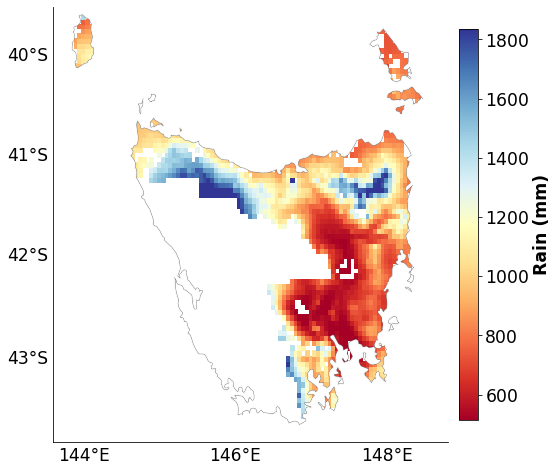

In [89]:
from matplotlib import pyplot as plt
import cartopy.crs as ccrs
import matplotlib as mpl
import cartopy.feature as cfeature
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

#Plotting single map with mean temperature 
fig, ax = plt.subplots(1, 1, subplot_kw=dict(projection=ccrs.Mercator(central_longitude=146)),figsize=(10,8))

p=nc_r.rain.mean(dim=('year'), skipna=True).plot(x='lon', y='lat', transform=ccrs.PlateCarree(central_longitude=0),
robust=True, cmap=mpl.cm.RdYlBu, zorder=1, add_colorbar=False)

gl=ax.gridlines(crs=ccrs.PlateCarree(), linewidth=0.01, color='w', alpha=0, linestyle='-', 
                draw_labels=True,dms=True, x_inline=False, y_inline=False)
#ax.coastlines(color='k',linewidth=0.3, zorder=4)
ax.add_feature(cfeature.COASTLINE, edgecolor = "grey", linewidth=2)
ax.add_feature(cfeature.STATES, edgecolor = "grey", linewidth=0.3, zorder=1)
ax.add_feature(cfeature.OCEAN, color='white', zorder=2)
ax.add_feature(cfeature.LAKES, color='white', zorder=1.5)
ax.add_feature(cfeature.BORDERS, edgecolor = "grey", color='grey', linewidth=1)
ax.set_extent([143.6, 148.8, -43.8, -39.5], crs=ccrs.PlateCarree())
gl.xlabels_top = False
gl.ylabels_right = False

gl.xlocator = mticker.FixedLocator([144, 146, 148])
gl.ylocator = mticker.FixedLocator([-40, -41, -42,-43])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 17, 'color': 'k'}
gl.ylabel_style = {'size': 17, 'color': 'k'}

#Colorbar attributes
cb = plt.colorbar(p, orientation="vertical", pad=0.02, shrink=0.9)
cb.set_label(label='Rain (mm)', size='xx-large', weight='bold')
cb.ax.tick_params(labelsize='xx-large')

ax.outline_patch.set_visible(False)
ax.spines['left'].set_visible(True)  
ax.spines['bottom'].set_visible(True)

## Mapping mean of cumulative radiation across years 

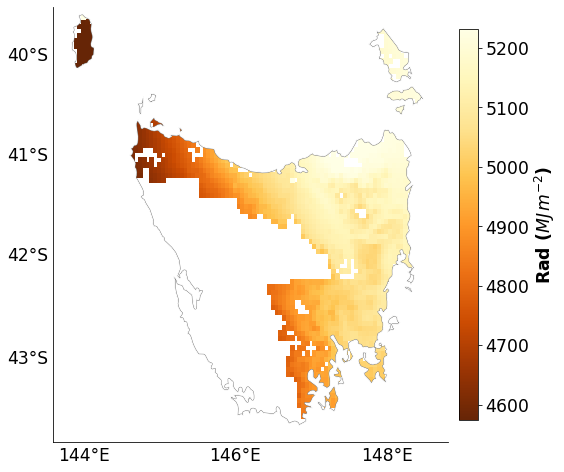

In [90]:
from matplotlib import pyplot as plt
import cartopy.crs as ccrs
import matplotlib as mpl
import cartopy.feature as cfeature
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

#Plotting single map with mean temperature 
fig, ax = plt.subplots(1, 1, subplot_kw=dict(projection=ccrs.Mercator(central_longitude=146)),figsize=(10,8))

p=nc_r.radn.mean(dim=('year'), skipna=True).plot(x='lon', y='lat', transform=ccrs.PlateCarree(central_longitude=0),
robust=True, cmap=mpl.cm.YlOrBr_r, zorder=1, add_colorbar=False)

gl=ax.gridlines(crs=ccrs.PlateCarree(), linewidth=0.01, color='w', alpha=0, linestyle='-', 
                draw_labels=True,dms=True, x_inline=False, y_inline=False)
#ax.coastlines(color='k',linewidth=0.3, zorder=4)
ax.add_feature(cfeature.COASTLINE, edgecolor = "grey", linewidth=2)
ax.add_feature(cfeature.STATES, edgecolor = "grey", linewidth=0.3, zorder=1)
ax.add_feature(cfeature.OCEAN, color='white', zorder=2)
ax.add_feature(cfeature.LAKES, color='white', zorder=1.5)
ax.add_feature(cfeature.BORDERS, edgecolor = "grey", color='grey', linewidth=1)
ax.set_extent([143.6, 148.8, -43.8, -39.5], crs=ccrs.PlateCarree())
gl.xlabels_top = False
gl.ylabels_right = False

gl.xlocator = mticker.FixedLocator([144, 146, 148])
gl.ylocator = mticker.FixedLocator([-40, -41, -42,-43])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 17, 'color': 'k'}
gl.ylabel_style = {'size': 17, 'color': 'k'}

#Colorbar attributes
cb = plt.colorbar(p, orientation="vertical", pad=0.02, shrink=0.9)
cb.set_label(label='Rad ($MJ\,m^{-2}$)', size='xx-large', weight='bold')
cb.ax.tick_params(labelsize='xx-large')

ax.outline_patch.set_visible(False)
ax.spines['left'].set_visible(True)  
ax.spines['bottom'].set_visible(True)

#Save the map
#plt.savefig(r'C:\Users\uqjojeda\Nextcloud\PURTERRA-A0131\2020\paper\figs\rad.png', dpi=600, bbox_inches='tight', pad_inches=0)

## Mapping mean tmin across years 

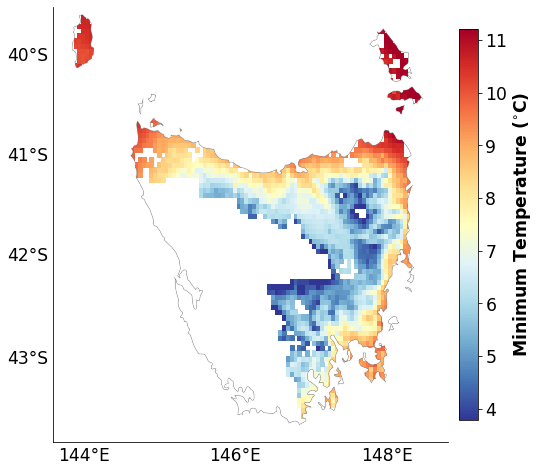

In [96]:
from matplotlib import pyplot as plt
import cartopy.crs as ccrs
import matplotlib as mpl
import cartopy.feature as cfeature
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

#Plotting single map with mean temperature 
fig, ax = plt.subplots(1, 1, subplot_kw=dict(projection=ccrs.Mercator(central_longitude=146)),figsize=(10,8))

p=nc_t.mint.mean(dim=('year'), skipna=True).plot(x='lon', y='lat', transform=ccrs.PlateCarree(central_longitude=0),
robust=True, cmap=mpl.cm.RdYlBu_r, zorder=1, add_colorbar=False)

gl=ax.gridlines(crs=ccrs.PlateCarree(), linewidth=0.01, color='w', alpha=0, linestyle='-', 
                draw_labels=True,dms=True, x_inline=False, y_inline=False)
#ax.coastlines(color='k',linewidth=0.3, zorder=4)
ax.add_feature(cfeature.COASTLINE, edgecolor = "grey", linewidth=2)
ax.add_feature(cfeature.STATES, edgecolor = "grey", linewidth=0.3, zorder=1)
ax.add_feature(cfeature.OCEAN, color='white', zorder=2)
ax.add_feature(cfeature.LAKES, color='white', zorder=1.5)
ax.add_feature(cfeature.BORDERS, edgecolor = "grey", color='grey', linewidth=1)
ax.set_extent([143.6, 148.8, -43.8, -39.5], crs=ccrs.PlateCarree())
gl.xlabels_top = False
gl.ylabels_right = False

gl.xlocator = mticker.FixedLocator([144, 146, 148])
gl.ylocator = mticker.FixedLocator([-40, -41, -42,-43])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 17, 'color': 'k'}
gl.ylabel_style = {'size': 17, 'color': 'k'}

#Colorbar attributes
cb = plt.colorbar(p, orientation="vertical", pad=0.02, shrink=0.9)
cb.set_label(label='Minimum Temperature ($^{\circ}$C)', size='xx-large', weight='bold')
cb.ax.tick_params(labelsize='xx-large')

ax.outline_patch.set_visible(False)
ax.spines['left'].set_visible(True)  
ax.spines['bottom'].set_visible(True)

#Save the map
#plt.savefig(r'C:\Users\uqjojeda\Nextcloud\PURTERRA-A0131\2020\paper\figs\rad.png', dpi=600, bbox_inches='tight', pad_inches=0)

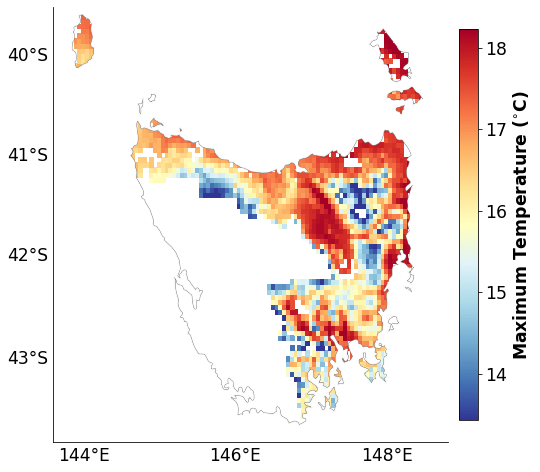

In [97]:
from matplotlib import pyplot as plt
import cartopy.crs as ccrs
import matplotlib as mpl
import cartopy.feature as cfeature
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

#Plotting single map with mean temperature 
fig, ax = plt.subplots(1, 1, subplot_kw=dict(projection=ccrs.Mercator(central_longitude=146)),figsize=(10,8))

p=nc_t.maxt.mean(dim=('year'), skipna=True).plot(x='lon', y='lat', transform=ccrs.PlateCarree(central_longitude=0),
robust=True, cmap=mpl.cm.RdYlBu_r, zorder=1, add_colorbar=False)

gl=ax.gridlines(crs=ccrs.PlateCarree(), linewidth=0.01, color='w', alpha=0, linestyle='-', 
                draw_labels=True,dms=True, x_inline=False, y_inline=False)
#ax.coastlines(color='k',linewidth=0.3, zorder=4)
ax.add_feature(cfeature.COASTLINE, edgecolor = "grey", linewidth=2)
ax.add_feature(cfeature.STATES, edgecolor = "grey", linewidth=0.3, zorder=1)
ax.add_feature(cfeature.OCEAN, color='white', zorder=2)
ax.add_feature(cfeature.LAKES, color='white', zorder=1.5)
ax.add_feature(cfeature.BORDERS, edgecolor = "grey", color='grey', linewidth=1)
ax.set_extent([143.6, 148.8, -43.8, -39.5], crs=ccrs.PlateCarree())
gl.xlabels_top = False
gl.ylabels_right = False

gl.xlocator = mticker.FixedLocator([144, 146, 148])
gl.ylocator = mticker.FixedLocator([-40, -41, -42,-43])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 17, 'color': 'k'}
gl.ylabel_style = {'size': 17, 'color': 'k'}

#Colorbar attributes
cb = plt.colorbar(p, orientation="vertical", pad=0.02, shrink=0.9)
cb.set_label(label='Maximum Temperature ($^{\circ}$C)', size='xx-large', weight='bold')
cb.ax.tick_params(labelsize='xx-large')

ax.outline_patch.set_visible(False)
ax.spines['left'].set_visible(True)  
ax.spines['bottom'].set_visible(True)

#Save the map
#plt.savefig(r'C:\Users\uqjojeda\Nextcloud\PURTERRA-A0131\2020\paper\figs\rad.png', dpi=600, bbox_inches='tight', pad_inches=0)